# Concevez une application au service de la santé publique 1: Nettoyage

Objectifs: 
-  Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations. Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple). 
- Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.
-  Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
- Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

# Sommaire
### [I Exploration du jeu de données et sélection des variables](#I-Exploration-du-jeu-de-données-et-sélection-des-variables)
__[I.1 Chargement des données](#I.1-Chargement-des-données)__

__[I.2 Sélection des variables](#I.2-Sélection-des-variables)__\
[I.2.1 product_name et generic_name](#I.2.1-product_name-et-generic_name)\
[I.2.2 quantity - brands_tags](#I.2.2-quantity---brands_tags)\
[I.2.3 Categories](#I.2.3-Categories)\
[I.2.4 Origins - Manufacturing_places - purchase places - countries](#I.2.4-Origins---Manufacturing_places---purchase-places---countries)\
[I.2.5 labels - stores](#I.2.5-labels---stores)\
[I.2.6 PNNS groups](#I.2.6-PNNS-groups)\
[I.2.7 Variables en lien avec les données nutritionnelles](#I.2.7-Variables-en-lien-avec-les-données-nutritionnelles)\
[I.2.8 Conclusion](#I.2.8-Conclusion)

__[Création des dataframes pour chaque idée d'application](#Création-des-dataframes-pour-chaque-idée-d'application)__\
[Première idée](#Première-idée)\
[Deuxième idée](#Deuxième-idée)\
[Troisième idée](#Troisième-idée)
### [II Nettoyage des datasets](#II-Nettoyage-des-datasets)
__[II.1 Chargement des datasets](#II.1-Chargement-des-datasets)__

__[II.2 Nettoyage du jeu de données: valeurs incohérentes et/ou extrêmes](#II.2-Nettoyage-du-jeu-de-données:-valeurs-incohérentes-et/ou-extrêmes)__\
[II.2.1 Valeurs typiques et atypiques des compositions énergétiques totale et par macro-nutriment](#II.2.1-Valeurs-typiques-et-atypiques-des-compositions-énergétiques-totale-et-par-macro-nutriment)\
[II.2.2 Valeurs typiques et atypiques des compositions énergétiques totales par groupe d'aliments (pnns_groups)](#II.2.2-Valeurs-typiques-et-atypiques-des-compositions-énergétiques-totales-par-groupe-d'aliments-(pnns_groups))\
[II.2.3 Traitement des valeurs atypiques: cohérence des variables](#II.2.3-Traitement-des-valeurs-atypiques:-cohérence-des-variables)\
[II.2.3.i Traitement sur la sous-catégorie des carottes râpées](#II.2.3.i-Traitement-sur-la-sous-catégorie-des-carottes-râpées)\
[II.2.3.ii Traitement sur les données générales](#II.2.3.ii-Traitement-sur-les-données-générales)\
[II.2.4 Fusion des catégories Fruits et fruits](#II.2.4-Fusion-des-catégories-Fruits-et-fruits)

__[II.3 Traitement des valeurs manquantes](#II.3-Traitement-des-valeurs-manquantes)__\
[II.3.1 Remplissage de fiber_kcal](#II.3.1-Remplissage-de-fiber_kcal)\
[II.3.2 Cas des autres macronutriments: fat, carbohydrates et proteins](#II.3.2-Cas-des-autres-macronutriments:-fat,-carbohydrates-et-proteins)\
[II.3.3 Nettoyage des valeurs aberrantes (bis)](#II.3.3-Nettoyage-des-valeurs-aberrantes-(bis))
### [III Automatisation des traitements](#III-Automatisation-des-traitements)\

# Partie 1 Exploration du jeu de données et Nettoyage des données

# I Exploration du jeu de données et sélection des variables

## I.1 Chargement des données

In [890]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import missingno as msno

In [404]:
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,19,20,21,22,23,27,28,29,31,38,47,52,55,64,134) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835100 entries, 0 to 1835099
Columns: 186 entries, code to carnitine_100g
dtypes: float64(122), int64(2), object(62)
memory usage: 2.5+ GB


In [5]:
df.shape

(1835100, 186)

**Trois idées d'application:**

1. Une idée d'application pourrait être de fournir des recommandations de sélection de plats et/ou d'aliments permettant de suivre les recommandations du PNNS:
    - Au moins 5 fruits et légumes par jour
    - Des féculents à chaque repas selon l’appétit
    - 3 produits laitiers (lait, yaourt, fromage) par jour
    - 1 à 2 portions de viande, œufs et produits de la pêche par jour
    - Limiter les matières grasses ajoutées, le sucre et le sel

    Cette recommandation doit proposer les produits de meilleurs nutriscore et ecoscore dans leurs catégories. Dans un premier temps, on pourra limiter cette recommandation à un combo One-dish meal + yaourt + fruits. Autre possibilité: à partir d'un aliment scanné, proposer de quoi compléter le menu. On va avoir besoin des apports en energie, et lipides/glucides/protides.

    energie
    - homme 2700kcal
    - femme 2200 kcal

    nutriments
    - lipides 35-40% AET (80-110g)
    - protides 10-20% AET (50-125g)
    - glucides 40-55% AET (205-340g)
    - sucres: max 100g
    - fibres: 30g

    On va donc avoir besoin de renseignements concernant les apports nutritionnels et notamment l'énergie, les apports en sel/protéines/lipides et glucides et les types d'aliments. Le nutriscore et l'ecoscore pour pouvoir faire une sélection des produits les plus écologiques et sains (dans leur catégorie).

2. Une deuxième idée pourrait être de donner, à partir d'un ensemble de produits scannés, les quantités de sucre, sel, gras protéines fibres absorbés. On peut ensuite fournir une note se référant aux AJR, ou aux recommandations du PNNS: par exemple, verifier que la quantité de sel ingérée est inférieure à 7,5g, que l'apport en fibres se rapproche de 30g etc.

3. Enfin, une dernière idée pourrait être de simplement donner un meilleur équivalent en termes de nutriscore, ecoscore, nova_group etc. d'un produit scanné.

## I.2 Sélection des variables

**Commençons par afficher les colonnes**

In [393]:
cols = pd.Series(df.columns)
cols.head(50)

0                          code
1                           url
2                       creator
3                     created_t
4              created_datetime
5               last_modified_t
6        last_modified_datetime
7                  product_name
8      abbreviated_product_name
9                  generic_name
10                     quantity
11                    packaging
12               packaging_tags
13               packaging_text
14                       brands
15                  brands_tags
16                   categories
17              categories_tags
18                categories_en
19                      origins
20                 origins_tags
21                   origins_en
22         manufacturing_places
23    manufacturing_places_tags
24                       labels
25                  labels_tags
26                    labels_en
27                    emb_codes
28               emb_codes_tags
29     first_packaging_code_geo
30                       cities
31      

### I.2.1 product_name et generic_name

**Regardons si on peut raisonnablement se séparer des produits pour lesquels product_name n'est pas renseigné**

In [160]:
d = df.loc[df.product_name.isna()]

In [198]:
d.shape

(78702, 186)

In [199]:
d = df.loc[df.product_name.notna()]

In [200]:
d.shape

(1756398, 186)

In [353]:
pna = df.product_name.isna().sum()/df.shape[0]
print("Le product_name n'est pas renseigné dans {:.1f}% des cas.".format(pna*100))

Le product_name n'est pas renseigné dans 4.3% des cas.


**La proportion de lignes pour lesquelles product_name n'est pas renseigné est plutôt faible.**

**Affichons la matrice de remplissage pour ces deux colonnes**

<AxesSubplot:>

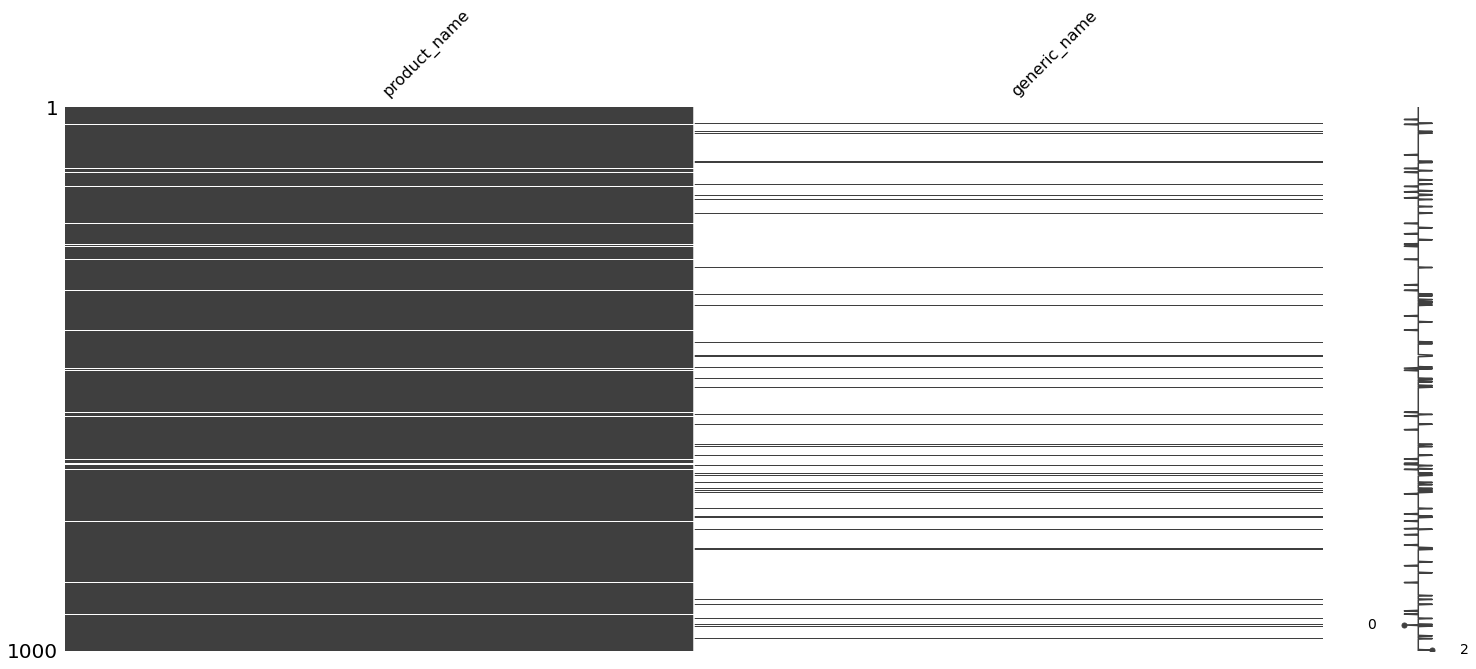

In [204]:
msno.matrix(df[['product_name', 'generic_name']].sample(1000))

In [205]:
df.dropna(subset=['product_name', 'generic_name'], how='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835095,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835096,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835097,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,Fati,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835098,9999999999994,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1613129728,2021-02-12T11:35:28Z,1613129730,2021-02-12T11:35:30Z,Light & Free SKYR A BOIRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Si on ne garde que les lignes pour lesquelles generic_name est renseigné, a-t-on beaucoup de NaN dans la colonne product_name?**

In [208]:
d = df.loc[df.generic_name.notna()]
d.loc[d.product_name.isna()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
276672,0200030115662,http://world-en.openfoodfacts.org/product/0200...,kiliweb,1541894643,2018-11-11T00:04:03Z,1581540998,2020-02-12T20:56:38Z,NaN,NaN,Chocolat au lait 28% de cacao,...,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326661,0390526004003,http://world-en.openfoodfacts.org/product/0390...,agamitsudo,1398250595,2014-04-23T10:56:35Z,1568044377,2019-09-09T15:52:57Z,NaN,NaN,Carrés feuilletés,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480245,12000810,http://world-en.openfoodfacts.org/product/1200...,openfoodfacts-contributors,1617282923,2021-04-01T13:15:23Z,1617393845,2021-04-02T20:04:05Z,NaN,NaN,Kalorienarmes koffeinhaltiges Erfrischungsgetränk,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481838,12772035,http://world-en.openfoodfacts.org/product/1277...,cjk,1601028226,2020-09-25T10:03:46Z,1601063426,2020-09-25T19:50:26Z,NaN,NaN,"Wrong barcode scanned, see 4388844163362",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491349,2000000038095,http://world-en.openfoodfacts.org/product/2000...,bleakpatch,1478519058,2016-11-07T11:44:18Z,1478519979,2016-11-07T11:59:39Z,NaN,NaN,Бананы,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777305,87179095,http://world-en.openfoodfacts.org/product/8717...,kiliweb,1543925434,2018-12-04T12:10:34Z,1616495035,2021-03-23T10:23:55Z,NaN,NaN,"cereal balls with 20% whole grain oat flakes, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815957,9186130057938,http://world-en.openfoodfacts.org/product/9186...,openfoodfacts-contributors,1474118815,2016-09-17T13:26:55Z,1619345408,2021-04-25T10:10:08Z,NaN,NaN,Assortiment de biscuits,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823929,9326451765161,http://world-en.openfoodfacts.org/product/9326...,foodorigins,1465468578,2016-06-09T10:36:18Z,1565969294,2019-08-16T15:28:14Z,NaN,NaN,Champagne ham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1828616,9415767035355,http://world-en.openfoodfacts.org/product/9415...,marilyn,1562257079,2019-07-04T16:17:59Z,1562257229,2019-07-04T16:20:29Z,NaN,NaN,Jus d'orange,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Le nombre de lignes pour lesquelles generic_name est renseigné mais product_name est manquant est très réduit en comparaison du nombre de lignes du dataset. On peut éliminer les lignes pour lesquelles product_name n'est pas renseigné, car dans la grande majorité des cas generic_name n'est alors pas renseigné non plus, et il est alors impossible de savoir de quel produit il s'agit.**

In [368]:
df.dropna(subset=['product_name'])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835095,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835096,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835097,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,Fati,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835098,9999999999994,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1613129728,2021-02-12T11:35:28Z,1613129730,2021-02-12T11:35:30Z,Light & Free SKYR A BOIRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I.2.2 quantity - brands_tags

In [398]:
pack = df[df.columns[10:16]]
pack.dropna()

,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags
399,180 g,"pot en verre,verre","pot-en-verre,verre",1 pot en verre à recycler,Kazidomi,kazidomi
401,180 g,"pot en verre,verre","pot-en-verre,verre",1 pot en verre à recycler,Kazidomi,kazidomi
976,300 g,"pot en verre,verre","pot-en-verre,verre",1 pot en verre à recycler,Kazidomi,kazidomi
977,300 g,"pot en verre,verre","pot-en-verre,verre",1 pot en verre à recycler,Kazidomi,kazidomi
978,300 g,"pot en verre,verre","pot-en-verre,verre",1 pot en verre à recycler,Kazidomi,kazidomi
...,...,...,...,...,...,...
1825071,300 g,Plastic,plastic,1 PET packet,Macro Wholefoods,macro-wholefoods
1825343,1 kg,"Fresh,Bag,Plastic","fresh,bag,plastic",1 plastic bag to discard,Koala Cherries,koala-cherries
1826528,330g,"Plastic,Cardboard","plastic,cardboard",Recyclable Our containers are made BPA free & ...,My Muscle Chef,my-muscle-chef
1830769,650 g (10 x 65 g),plastique,plastique,1 sachet plastique à recycler,Ibumie,ibumie


**Quantity peut eventuellement être intéressante pour calculer des quantités par portions. En revanche les autres variables ne vont probablement pas nous servir**

### I.2.3 Categories

In [410]:
categories = df[['product_name',
        'categories',
        'categories_tags',
        'categories_en',
        'main_category',
        'main_category_en'
        ]].dropna()

In [411]:
categories.head()

,product_name,categories,categories_tags,categories_en,main_category,main_category_en
5,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",en:mustards,Mustards
6,Sfiudwx,Xsf,fr:xsf,fr:xsf,fr:xsf,fr:xsf
15,Pate d'amende,Pâte d'amende,fr:pate-d-amende,fr:pate-d-amende,fr:pate-d-amende,fr:pate-d-amende
16,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...","en:meals,en:prepared-vegetables,en:grated-carr...","Meals,Prepared vegetables,Grated carrots,Seaso...",en:seasoned-shredded-carrots,Seasoned shredded carrots
25,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco","en:pies,en:sweet-pies,en:coconut-pies","Pies,Sweet pies,Coconut pies",en:coconut-pies,Coconut pies


**Parmi les colonnes "categories", la colonne "categories_tags" semble mieux appropriée car formatée. On ne conserve que cette colonne**

In [390]:
categories = categories.drop(columns=['categories', 'categories_en', 'main_category_en'])

In [391]:
categories.categories_tags.nunique()

29949

**Beaucoup de categories_tags différents. C'est sans doute car chaque tag est un assemblage de plusieurs tags.**

**Regardons ce qu'il en est des main_category**

In [392]:
categories.main_category.nunique()

13370

**C'est donc aussi le cas pour les main_category. Idéalement, il faudrait pouvoir séparer les categories_tags. Mais regardons d'abord les colonnes pnns_groups qui sont également des catégories d'aliments et de plats.**

### I.2.4 Origins - Manufacturing_places - purchase places - countries

**On va regarder les colonnes origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
purchase_places
countries
countries_tags
countries_en
de plus près**

In [133]:
df[['product_name',
    'origins',
    'origins_tags',
    'origins_en',
    'manufacturing_places',
    'manufacturing_places_tags',
    'purchase_places',
    'countries',
    'countries_tags',
    'countries_en']]

,product_name,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,purchase_places,countries,countries_tags,countries_en
0,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
2,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
3,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain
4,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain
...,...,...,...,...,...,...,...,...,...,...
1835095,Sandwich club Rillette poisson combava,NaN,NaN,NaN,NaN,NaN,NaN,en:re,en:reunion,Réunion
1835096,Thé noir BIO Darjeeling,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1835097,Fati,NaN,NaN,NaN,NaN,NaN,NaN,en:be,en:belgium,Belgium
1835098,Light & Free SKYR A BOIRE,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France


**Essayons de ne récupérer que les produits français**

In [134]:
df.loc[df.countries_tags=='en:france'][['product_name',
    'origins',
    'origins_tags',
    'origins_en',
    'manufacturing_places',
    'manufacturing_places_tags',
    'purchase_places',
    'countries',
    'countries_tags',
    'countries_en']]

,product_name,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,purchase_places,countries,countries_tags,countries_en
0,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
2,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
5,moutarde au moût de raisin,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
6,Sfiudwx,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France
...,...,...,...,...,...,...,...,...,...,...
1835089,Minis beignets,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
1835092,Steak haché pur boeuf,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
1835096,Thé noir BIO Darjeeling,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1835098,Light & Free SKYR A BOIRE,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France


**Y a-t-il des colonnes qui se démarquent en terme de remplissage?**

<AxesSubplot:>

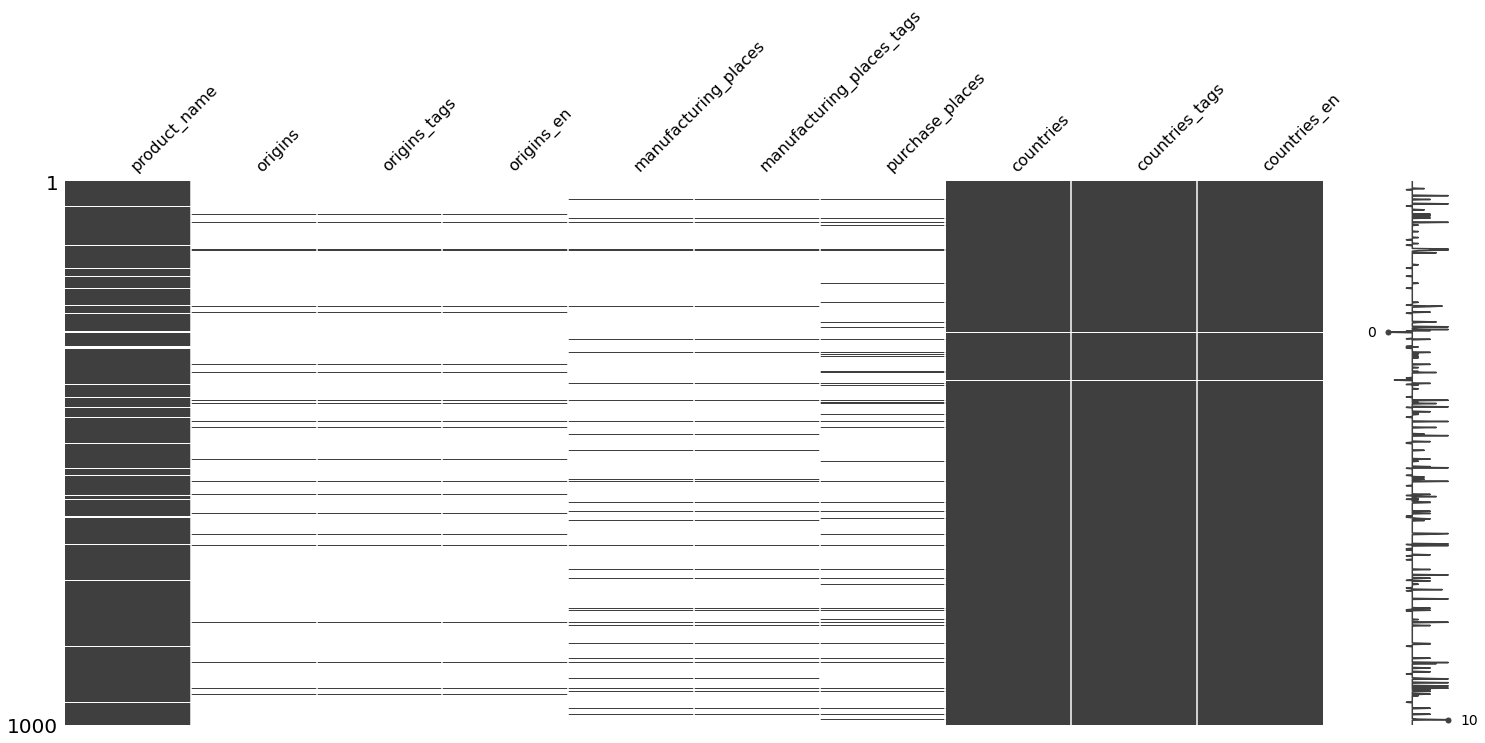

In [355]:
d =  df[['product_name',
    'origins',
    'origins_tags',
    'origins_en',
    'manufacturing_places',
    'manufacturing_places_tags',
    'purchase_places',
    'countries',
    'countries_tags',
    'countries_en']]
msno.matrix(d.sample(1000))

**On ne garde que les colonnes countries: mieux renseignées, et pour le moment l'information qu'apportent les autres colonnes ne semble pas indispensable.**

### I.2.5 labels - stores

In [401]:
labels = df[df.columns[24:34]]
labels.dropna()

,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores


In [403]:
# Regardons pour des sous-ensembles de colonnes
labels_1 = labels[labels.columns[:5]]
labels_1.dropna()

,labels,labels_tags,labels_en,emb_codes,emb_codes_tags
357,Point Vert,en:green-dot,Green Dot,EMB 35275A,emb-35275a
745,"Vegetariano, Vegano","en:vegetarian,en:vegan","Vegetarian,Vegan","ES 26.01868/TO EC, FABRICANTE Y ENVASADOR:, BO...","es-26-01868-to-ec,fabricante-y-envasador,bolto..."
970,"Point Vert, Fabriqué en France","en:green-dot,en:made-in-france","Green Dot,Made in France",000050,000050
1164,Unpasteurised milk,en:unpasteurised-milk,Unpasteurised-milk,FR 14.342.001 EC,fr-14-342-001-ec
1446,"French meat, fr:Viande Bovine Française , en:g...","en:french-meat,en:green-dot,fr:viande-bovine-f...","French meat,Green Dot,fr:viande-bovine-francaise",FR 31.091.010 EC,fr-31-091-010-ec
...,...,...,...,...,...
1834676,en:nutriscore-grade-e,"en:nutriscore,en:nutriscore-grade-e","Nutriscore,Nutriscore Grade E",FR 22.046.001 EC,fr-22-046-001-ec
1834758,Laktózmentes,en:no-lactose,No lactose,HU 250 EK,hu-250-ec
1834777,en:ab-agriculture-biologique,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique",FR 49.192.009 CE,fr-49-192-009-ec
1834926,1702,fr:1702,fr:1702,04/f04001152/003,04-f04001152-003


**La colonne EMB rassemble des indications diverses: EMB d'une part, et également estampille sanitaire. Pas terrible, mais potentiellement utile pour inférer/vérifier la provenance d'un produit si nécessaire.**

In [404]:
labels_2 = labels[labels.columns[5:]]
labels_2.dropna()

,first_packaging_code_geo,cities,cities_tags,purchase_places,stores


<AxesSubplot:>

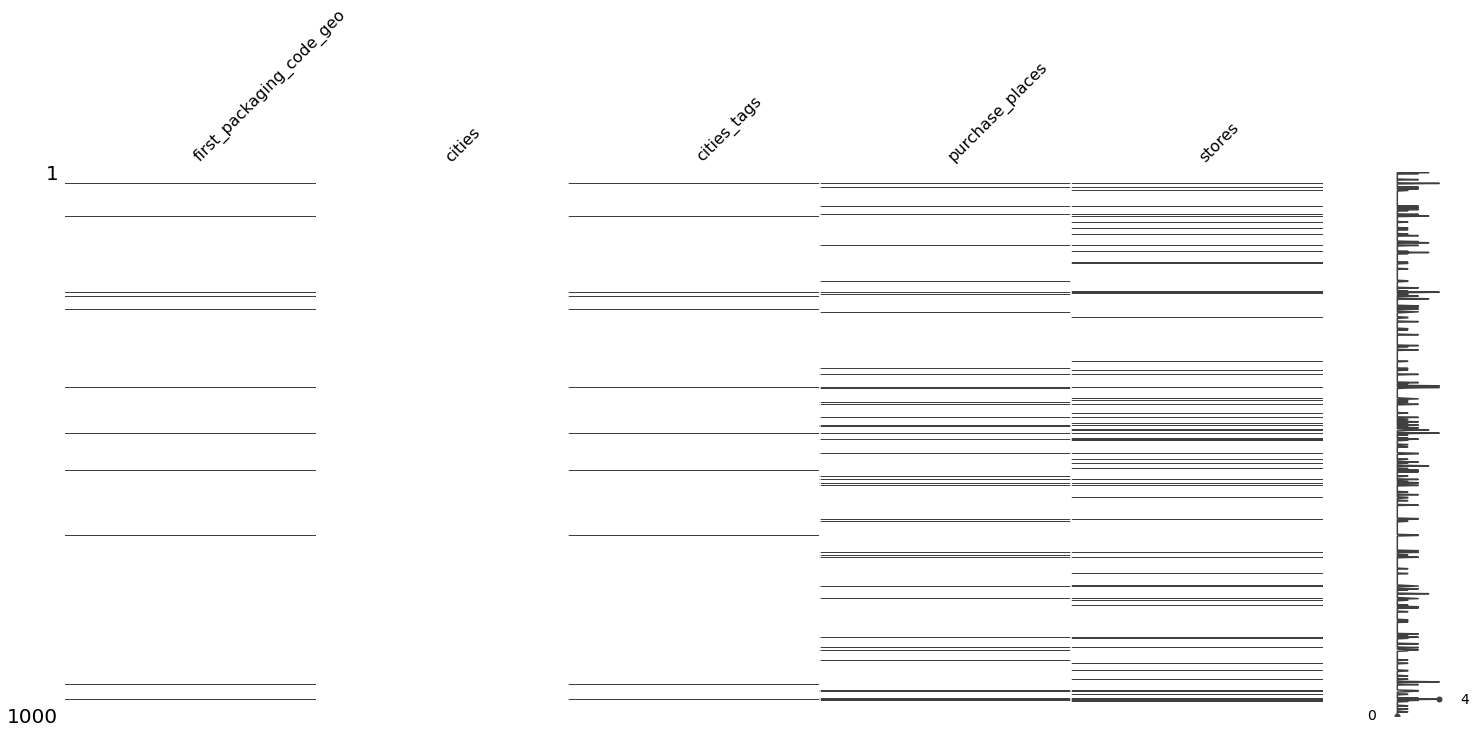

In [406]:
msno.matrix(labels_2.sample(1000))

**Cities totalement vide. On peut supprimer cette colonne et regarder les autres**

In [409]:
labels_2 = labels[labels.columns[5:]].drop(columns='cities')
labels_2.dropna()

,first_packaging_code_geo,cities_tags,purchase_places,stores
1164,"49.316667,-1.1",isigny-sur-mer-calvados-france,Ireland,Tesco
2058,"43.683333,0.816667",blanquefort-gers-france,Paris,Monoprix
19462,"47.483333,-3.116667",quiberon-morbihan-france,France,la belle iloise
23530,"47.683333,-0.866667",segre-maine-et-loire-france,Guadeloupe,Monoprix
45044,"44.45,4.716667",donzere-drome-france,"Orly,France,Paris,Le Brusc (83140)","Intermarché,Carrefour City"
...,...,...,...,...
1829991,"50.683333,1.916667",vieil-moutier-pas-de-calais-france,"Marseille 5°,France,Marseille",Azur Promo
1830123,"48.7,2.5",brunoy-essonne-france,"Noyelles-Godault,France,Caen","Auchan,Coop 5 pour 100"
1830130,"48.7,2.5",brunoy-essonne-france,"France,Manosque","Biocoop, Biocoop Caluire"
1834386,"46.166667,-1.15",rochelle-charente-maritime-france,"France,La Rochelle,Niort",Ernest Le Glacier


**Informations peu intéressantes pour nous dans un premier temps.** 

### I.2.6 PNNS groups

In [884]:
categories = df[['product_name',
                 'generic_name',
                 'categories_tags',
                 'pnns_groups_1',
                 'pnns_groups_2'
                ]].dropna()

In [885]:
categories.shape

(109390, 5)

In [886]:
categories.head(20)

,product_name,generic_name,categories_tags,pnns_groups_1,pnns_groups_2
334,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",Composite foods,One-dish meals
337,Salade Cesar,Laitue en salade,"en:plant-based-foods-and-beverages,en:plant-ba...",Fruits and vegetables,Vegetables
351,Danoises à la cannelle roulées,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",Sugary snacks,Biscuits and cakes
368,Flute,Flute,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Bread
375,Chaussons tressés aux pommes,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",sugary-snacks,pastries
392,Pain Burger Artisan,Pain,fr:boulange,unknown,unknown
399,Pesto à La Roquette Bio Kazidomi,Pesto à La Roquette,"en:groceries,en:sauces,en:pestos",Fat and sauces,Dressings and sauces
401,Crème d'Artichaut Bio Kazidomi,Crème d'artichaut,"en:spreads,en:salted-spreads,en:artichoke-spreads",Salty snacks,Salty and fatty products
415,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",Sugary snacks,Biscuits and cakes
420,Quiche Lorraine,Quiche lorraine,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",Composite foods,Pizza pies and quiche


In [17]:
categories.pnns_groups_2.nunique()

44

**Mieux! Regardons en détail les catégories et pnns_groups_2 pour la première entrée**

In [25]:
categories.iloc[0].categories_tags

'en:meals,en:meat-based-products,en:meals-with-meat,en:poultry-meals,en:microwave-meals,en:turkey-dishes'

**La présence de féculents n'est pas signalée**

**Qu'en est-il des colonnes labels, main_category?**

In [21]:
df[['product_name',
    'generic_name',
    'main_category',
    'main_category_en',
    'labels',
    'labels_tags',
    'labels_en'
   ]].dropna()

,product_name,generic_name,main_category,main_category_en,labels,labels_tags,labels_en
334,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,en:turkey-dishes,Turkey dishes,"Viande Française, Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:viande-francaise,Made in France"
399,Pesto à La Roquette Bio Kazidomi,Pesto à La Roquette,en:pestos,Pestos,"Organic, EU Organic, Non-EU Agriculture, EU Ag...","en:organic,en:eu-organic,en:non-eu-agriculture...","Organic,EU Organic,Non-EU Agriculture,EU Agric..."
401,Crème d'Artichaut Bio Kazidomi,Crème d'artichaut,en:artichoke-spreads,Artichoke spreads,"Organic, EU Organic, Non-EU Agriculture, EU Ag...","en:organic,en:eu-organic,en:non-eu-agriculture...","Organic,EU Organic,Non-EU Agriculture,EU Agric..."
415,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,en:shortbread-cookies,Shortbread cookies,Point Vert,en:green-dot,Green Dot
426,Bonbons acidulés Raisin Fraise,Bonbons acidulés Raisin Fraise,en:candies,Candies,"Contient des OGMs, Sans arômes artificiels","en:no-artificial-flavors,en:contains-gmos","No artificial flavors,Contains GMOs"
...,...,...,...,...,...,...,...
1834592,SAUMON EDEN,INTER AGRO,en:seafood,Seafood,Jamais congelé,en:never-frozen,Never frozen
1834697,Roussette du Bugey (2011),Vins blanc du Bugey,fr:bugey,fr:Bugey,AOC,fr:aoc,fr:AOC
1834731,Thé vert Earl grey,thé bio équitable,en:herbal-teas,Herbal teas,"Organic, EU Organic, Fair trade, Max Havelaar,...","en:organic,en:eu-organic,en:fair-trade,en:ab-a...","Organic,EU Organic,Fair trade,AB Agriculture B..."
1834951,Pate feuilletée sans gluten,Pâte Feuilletée avec de la matière grasse végé...,en:puff-pastry-sheets,Puff pastry sheets,Sans gluten,en:gluten-free,Gluten-free


**Dans un premier temps, les colonnes labels et main_category ne vont pas nous être très utiles. On se contentera des colonne categories ou pnns_groups pour catégoriser nos aliments.**

**quelles sont exactement les catégories pnns_groups_1 et 2?**

In [30]:
print(df.pnns_groups_1.unique())

['unknown' 'Fat and sauces' 'Composite foods' 'Sugary snacks'
 'Fruits and vegetables' 'Fish Meat Eggs' 'Beverages'
 'Milk and dairy products' 'Cereals and potatoes' 'Salty snacks'
 'sugary-snacks' nan 'fruits-and-vegetables' 'cereals-and-potatoes'
 'salty-snacks']


In [38]:
print(df.pnns_groups_2.dropna().unique())

['unknown' 'Dressings and sauces' 'One-dish meals' 'Biscuits and cakes'
 'Fruits' 'Meat' 'Sweetened beverages' 'Cheese' 'Bread' 'Fish and seafood'
 'Sweets' 'Salty and fatty products' 'Fruit juices' 'Dried fruits'
 'Vegetables' 'Fats' 'Dairy desserts' 'Milk and yogurt' 'pastries'
 'Pizza pies and quiche' 'Legumes' 'Unsweetened beverages' 'Nuts'
 'Cereals' 'Alcoholic beverages' 'Breakfast cereals' 'Appetizers'
 'Processed meat' 'Chocolate products' 'Eggs'
 'Plant-based milk substitutes' 'vegetables' 'Sandwiches' 'Ice cream'
 'Soups' 'Teas and herbal teas and coffees' 'Potatoes'
 'Artificially sweetened beverages' 'Waters and flavored waters' 'Offals'
 'fruits' 'Fruit nectars' 'Pizza pies and quiches' 'cereals' 'legumes'
 'nuts']


**Dans quelle catégorie(s) se retrouvent les pâtes alimentaires?**

In [41]:
df[df.generic_name=="spaghetti"][['generic_name', 'categories_tags', 'pnns_groups_1', 'pnns_groups_2']]

,generic_name,categories_tags,pnns_groups_1,pnns_groups_2
1553128,spaghetti,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Cereals
1574254,spaghetti,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Cereals


**Quels aliments contient pnns_groups_2==Cereals?**

In [47]:
df[df.pnns_groups_2=='Cereals']['generic_name'].dropna()

2774                                             Wheat Flour
2976                                      Tom Yum Noodle Pot
3124                                               Sacchetti
3592                                      Self raising flour
4592       Pasta de sémola de trigo duro adicionada con v...
                                 ...                        
1831326              vermicelles de riz thaï 100% naturelles
1831339                     Nouilles de riz blanc Biologique
1831340                   Nouilles de riz complet Biologique
1831421                                Nouilles instantanées
1834951    Pâte Feuilletée avec de la matière grasse végé...
Name: generic_name, Length: 5787, dtype: object

**Pnns_groups_2 semble être pertinente pour notre traitement. On la garde pour le moment.**  
**Regardons maintenant les colonnes en lien avec les données nutritionnelles**

### I.2.7 Variables en lien avec les données nutritionnelles

<AxesSubplot:>

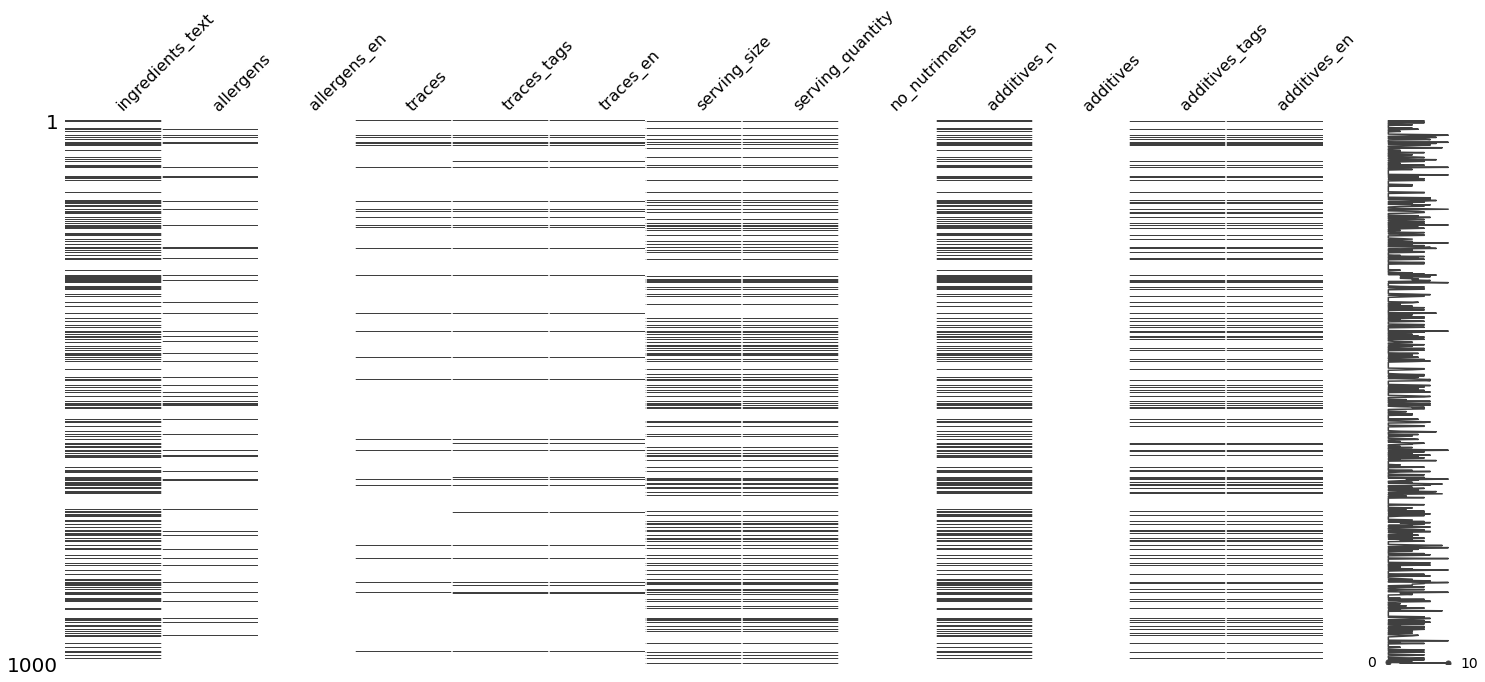

In [413]:
msno.matrix(df[df.columns[37:50]].sample(1000))

**On peut supprimer allergens_en, no_nutriments et additives**

In [414]:
df[df.columns[37:50]].drop(columns=['allergens_en', 'no_nutriments', 'additives']).dropna()

,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives_tags,additives_en
538,"Zucker, Kakaomasse, Kakaobutter, _Vollmilchpul...","en:milk,en:nuts,en:soybeans,de:Pisatazien","en:eggs,en:gluten,en:nuts,de:Alkohol","en:eggs,en:gluten,en:nuts,de:alkohol","Eggs,Gluten,Nuts,de:alkohol","12,5 g",12.5,3.0,"en:e322,en:e420,en:e422","E322 - Lecithins,E420 - Sorbitol,E422 - Glycerol"
764,"Farine de _blé_, huile de colza, sucre, _oeufs...","en:eggs,en:gluten,en:milk","en:nuts,en:soybeans","en:nuts,en:soybeans","Nuts,Soybeans",17.6g,17.6,5.0,"en:e422,en:e450,en:e471,en:e500,en:e503","E422 - Glycerol,E450 - Diphosphates,E471 - Mon..."
907,"Farine de _blé_, _œufs_ frais, huile de colza,...","en:eggs,en:gluten,en:milk","en:nuts,en:soybeans","en:nuts,en:soybeans","Nuts,Soybeans",serving,30.0,5.0,"en:e422,en:e450,en:e471,en:e500,en:e503","E422 - Glycerol,E450 - Diphosphates,E471 - Mon..."
962,Molkenproteinkonzentrat 99%(_Wheyproteinkonzen...,de:Wheyproteinkonzentrat,"en:gluten,en:milk,en:nuts","en:gluten,en:milk,en:nuts","Gluten,Milk,Nuts",31g,31.0,2.0,"en:e950,en:e955","E950 - Acesulfame k,E955 - Sucralose"
970,"Sucre, blanc d’_œufs_frais, poudre d’_amande_ ...","en:eggs,en:gluten,en:milk,en:nuts","en:nuts,en:soybeans","en:nuts,en:soybeans","Nuts,Soybeans",serving,22.0,3.0,"en:e422,en:e450,en:e500","E422 - Glycerol,E450 - Diphosphates,E500 - Sod..."
...,...,...,...,...,...,...,...,...,...,...
1831430,"EAU, OIGNONS, SAUCE SOJA EPAISSE (8.5%) (SUCRE...","en:crustaceans,en:gluten,en:soybeans",en:peanuts,en:peanuts,Peanuts,20 g,20.0,4.0,"en:e1422,en:e150a,en:e150c,en:e270","E1422 - Acetylated distarch adipate,E150a - Pl..."
1831817,"Wheat flour, Vegetable oil (Palm olein), Corn ...","en:gluten,en:milk,en:soybeans",en:peanuts,en:peanuts,Peanuts,22g,22.0,5.0,"en:e1100,en:e170,en:e170i,en:e322,en:e322i,en:...","E1100 - Alpha-Amylase,E170 - Calcium carbonate..."
1832336,"milk**, sugar, cocoa butter, cocoa mass, veget...",en:milk,"en:gluten,en:nuts","en:gluten,en:nuts","Gluten,Nuts",100 g,100.0,2.0,"en:e442,en:e476","E442 - Ammonium phosphatides,E476 - Polyglycer..."
1832439,"milk**, sugar, cocoa butter, cocoa mass, veget...",en:milk,"en:gluten,en:nuts","en:gluten,en:nuts","Gluten,Nuts",Per 100 g,100.0,2.0,"en:e442,en:e476","E442 - Ammonium phosphatides,E476 - Polyglycer..."


**Aucune colonne intéressante pour nous ici**

<AxesSubplot:>

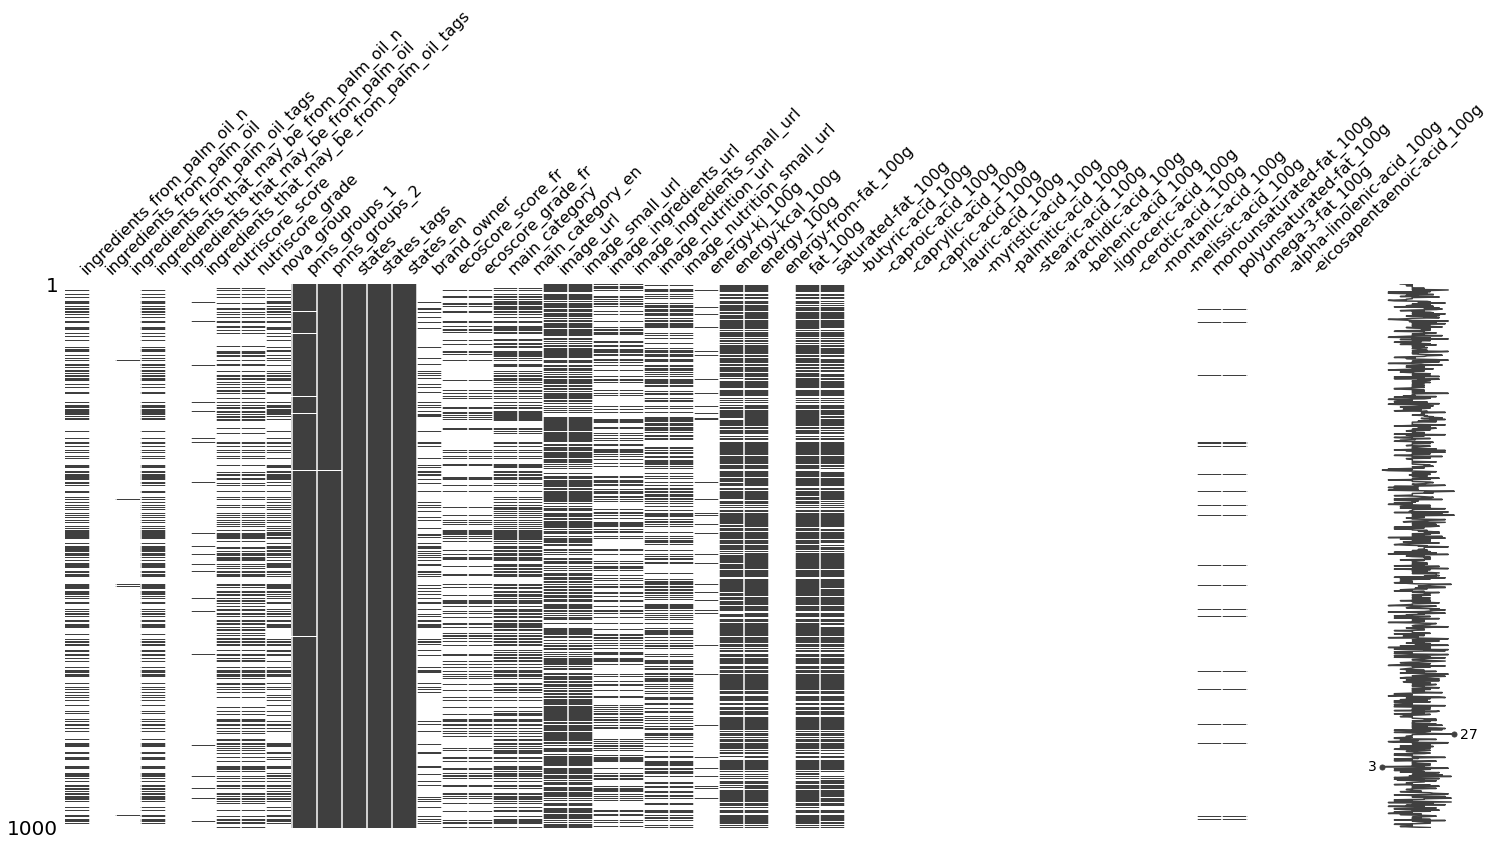

In [415]:
msno.matrix(df[df.columns[50:100]].sample(1000))

**Manifestement, il y a beaucoup de colonnes pour lesquelles le taux de remplissage est nul ou très faible.**

In [444]:
cols = df.columns[50:100]
df[df.columns[50:100]].notna().sum().sort_values()/df.shape[0]

ingredients_from_palm_oil                     0.000000
ingredients_that_may_be_from_palm_oil         0.000000
-caproic-acid_100g                            0.000003
-caprylic-acid_100g                           0.000003
-lignoceric-acid_100g                         0.000004
-stearic-acid_100g                            0.000006
-capric-acid_100g                             0.000007
-cerotic-acid_100g                            0.000007
-melissic-acid_100g                           0.000007
-myristic-acid_100g                           0.000008
-lauric-acid_100g                             0.000009
-montanic-acid_100g                           0.000011
-palmitic-acid_100g                           0.000014
-butyric-acid_100g                            0.000015
-behenic-acid_100g                            0.000019
-arachidic-acid_100g                          0.000050
-eicosapentaenoic-acid_100g                   0.000065
-alpha-linolenic-acid_100g                    0.000402
energy-fro

 **On décide de ne garder que les colonnes dont le taux de remplissage est supérieur à 1/100**

In [445]:
sort_cols = df[df.columns[50:100]].notna().sum().sort_values()/df.shape[0] > 1e-2
sort_cols

ingredients_from_palm_oil                     False
ingredients_that_may_be_from_palm_oil         False
-caproic-acid_100g                            False
-caprylic-acid_100g                           False
-lignoceric-acid_100g                         False
-stearic-acid_100g                            False
-capric-acid_100g                             False
-cerotic-acid_100g                            False
-melissic-acid_100g                           False
-myristic-acid_100g                           False
-lauric-acid_100g                             False
-montanic-acid_100g                           False
-palmitic-acid_100g                           False
-butyric-acid_100g                            False
-behenic-acid_100g                            False
-arachidic-acid_100g                          False
-eicosapentaenoic-acid_100g                   False
-alpha-linolenic-acid_100g                    False
energy-from-fat_100g                          False
omega-3-fat_

In [ ]:
d = df[cols]

In [446]:
keep_cols = sort_cols[sort_cols].index

In [447]:
keep_cols

Index(['ingredients_that_may_be_from_palm_oil_tags',
       'polyunsaturated-fat_100g', 'monounsaturated-fat_100g',
       'energy-kj_100g', 'brand_owner', 'ecoscore_score_fr',
       'ecoscore_grade_fr', 'nova_group', 'nutriscore_grade',
       'nutriscore_score', 'image_ingredients_url',
       'image_ingredients_small_url', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'main_category_en',
       'main_category', 'image_nutrition_url', 'image_nutrition_small_url',
       'image_small_url', 'image_url', 'energy-kcal_100g',
       'saturated-fat_100g', 'fat_100g', 'energy_100g', 'pnns_groups_1',
       'pnns_groups_2', 'states_en', 'states_tags', 'states'],
      dtype='object')

<AxesSubplot:>

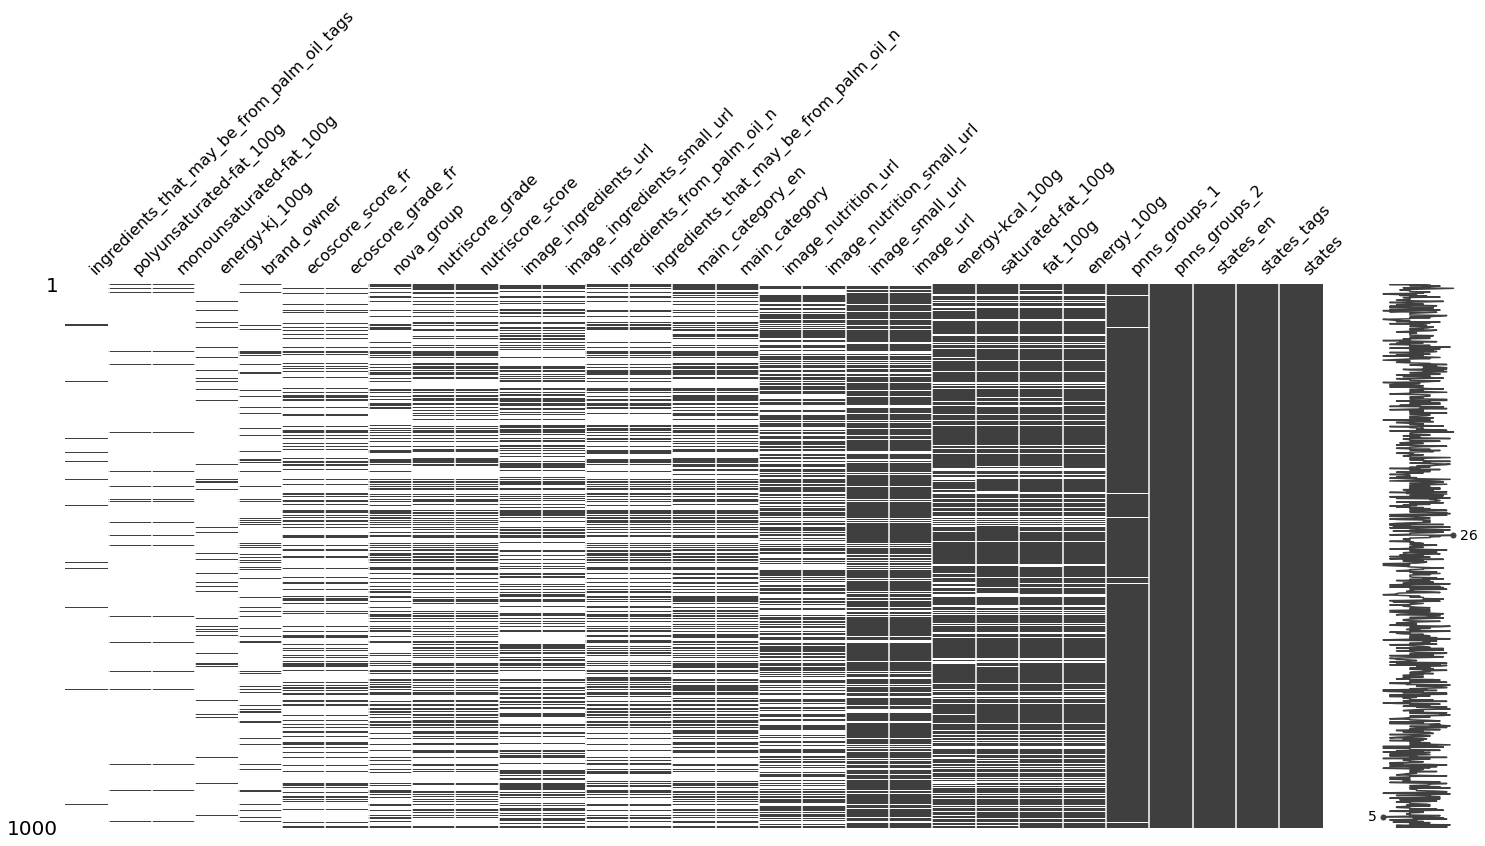

In [448]:
msno.matrix(d[keep_cols].sample(1000))

In [449]:
d[keep_cols].dropna()

,ingredients_that_may_be_from_palm_oil_tags,polyunsaturated-fat_100g,monounsaturated-fat_100g,energy-kj_100g,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,nova_group,nutriscore_grade,nutriscore_score,...,image_url,energy-kcal_100g,saturated-fat_100g,fat_100g,energy_100g,pnns_groups_1,pnns_groups_2,states_en,states_tags,states


**Aucun ligne pour laquelle toutes les valeurs sont renseignées. Séparons le df en deux comme précédemment.** 

In [453]:
d[keep_cols[:6]].dropna()

,ingredients_that_may_be_from_palm_oil_tags,polyunsaturated-fat_100g,monounsaturated-fat_100g,energy-kj_100g,brand_owner,ecoscore_score_fr
81880,e160a-beta-carotene,0.00,0.00,170.0,The Kellogg Company,35.0
88982,e160a-beta-carotene,21.43,10.71,111.0,Lipton,4.0


In [456]:
d[keep_cols[6:15]].dropna().head()

,ecoscore_grade_fr,nova_group,nutriscore_grade,nutriscore_score,image_ingredients_url,image_ingredients_small_url,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,main_category_en
70,b,4.0,a,-4.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,Baguettes
334,c,4.0,b,0.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,Turkey dishes
375,b,4.0,c,9.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,Apple turnovers
399,b,3.0,e,23.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,Pestos
420,d,4.0,b,2.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,1.0,Lorraine quiche


In [457]:
d[keep_cols[15:]].dropna().head()

,main_category,image_nutrition_url,image_nutrition_small_url,image_small_url,image_url,energy-kcal_100g,saturated-fat_100g,fat_100g,energy_100g,pnns_groups_1,pnns_groups_2,states_en,states_tags,states
35,en:pear-compotes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,157.0,0.0,0.0,657.0,Fruits and vegetables,Fruits,"To be completed,Nutrition facts completed,Ingr...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
72,fr:paves-de-saumon-fume,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,253.0,2.6,17.0,1059.0,Fish Meat Eggs,Fish and seafood,"To be completed,Nutrition facts completed,Ingr...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
97,en:wild-boar-rillettes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,325.0,11.0,29.0,1360.0,Salty snacks,Salty and fatty products,"To be completed,Nutrition facts completed,Ingr...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
114,en:squeezed-apple-juices,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,221.0,0.1,0.5,925.0,Beverages,Fruit juices,"To be completed,Nutrition facts completed,Ingr...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
164,en:dietary-supplements,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,unknown,unknown,"To be checked,Complete,Nutrition facts complet...","en:to-be-checked,en:complete,en:nutrition-fact...","en:to-be-checked, en:complete, en:nutrition-fa..."


On peut retenir:
- energy-kcal_100g
- fat_100g
- saturated-fat_100g
- nutriscore
- ecoscore
- nova group

On continue...

<AxesSubplot:>

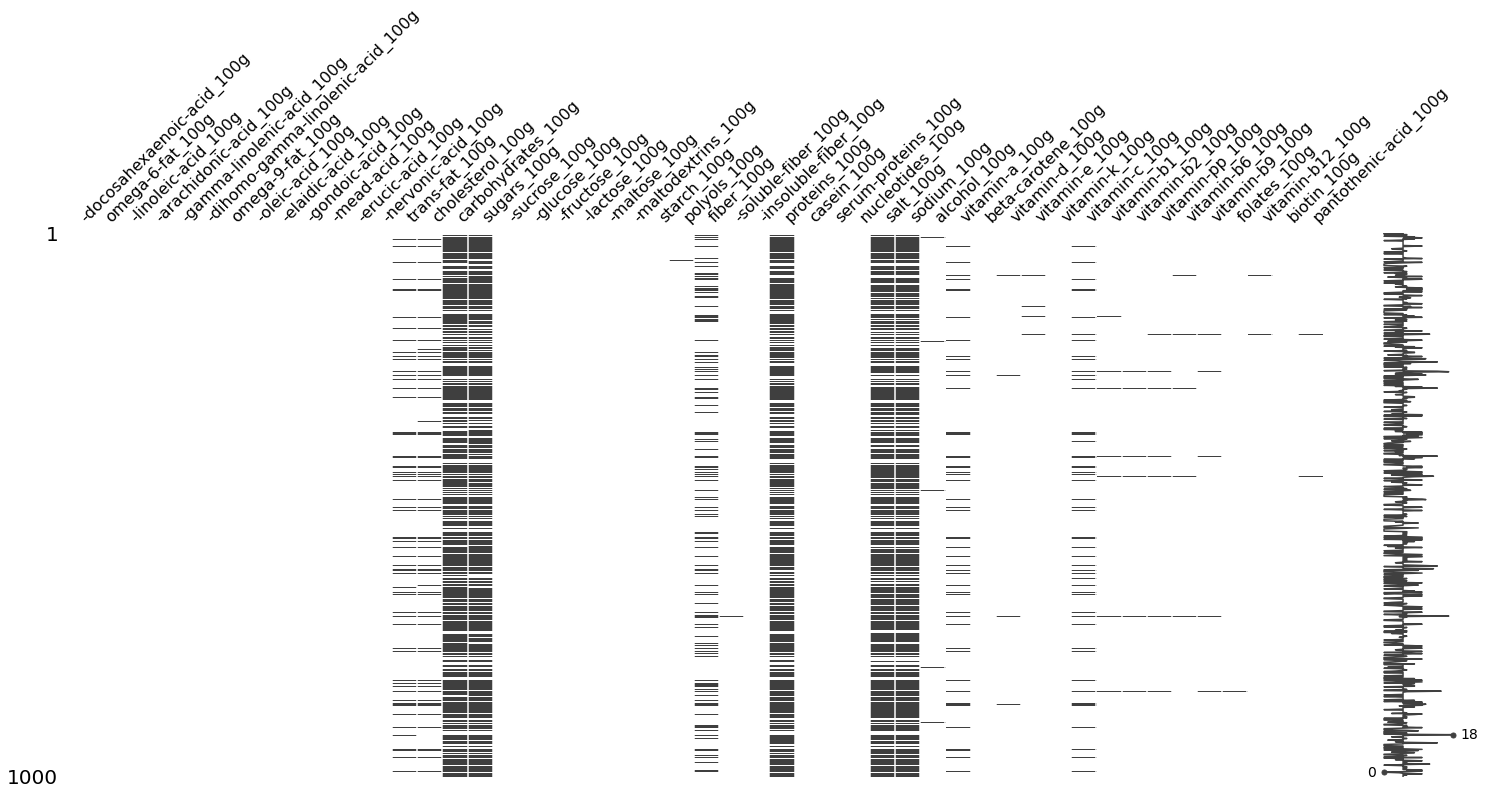

In [458]:
msno.matrix(df[df.columns[100:150]].sample(1000))

**Même traitement que précédemment...**

In [460]:
cols = df.columns[100:150]
df[df.columns[100:150]].notna().sum().sort_values()/df.shape[0]

-elaidic-acid_100g                   0.000001
-erucic-acid_100g                    0.000004
-nervonic-acid_100g                  0.000006
-dihomo-gamma-linolenic-acid_100g    0.000006
-mead-acid_100g                      0.000007
-gamma-linolenic-acid_100g           0.000008
-gondoic-acid_100g                   0.000015
nucleotides_100g                     0.000019
-maltose_100g                        0.000029
casein_100g                          0.000029
serum-proteins_100g                  0.000033
-oleic-acid_100g                     0.000034
-fructose_100g                       0.000044
beta-carotene_100g                   0.000045
-glucose_100g                        0.000049
omega-9-fat_100g                     0.000053
-arachidonic-acid_100g               0.000063
-maltodextrins_100g                  0.000070
-sucrose_100g                        0.000085
-docosahexaenoic-acid_100g           0.000115
-linoleic-acid_100g                  0.000256
starch_100g                       

In [463]:
sort_cols = df[df.columns[100:150]].notna().sum().sort_values()/df.shape[0] > 1e-2
keep_cols = sort_cols[sort_cols].index
d = df[cols]
d[keep_cols].dropna()

,alcohol_100g,vitamin-b2_100g,vitamin-b1_100g,vitamin-pp_100g,vitamin-a_100g,vitamin-c_100g,trans-fat_100g,cholesterol_100g,fiber_100g,sodium_100g,salt_100g,sugars_100g,carbohydrates_100g,proteins_100g
22092,0,0.000600,0.0000,0.007667,0.000000,0.0000,0.0,0.017,3.3,0.900000,2.250000,0.0000,63.3300,13.3300
22096,0,0.000567,0.0000,0.005333,0.000000,0.0000,0.0,0.033,3.3,0.833000,2.082500,0.0000,66.6700,10.0000
27497,0,0.001371,0.0010,0.001200,0.000484,0.0194,0.0,0.000,6.5,0.581000,1.452500,29.0300,80.6500,3.2300
27625,0,0.001417,0.0010,0.001200,0.000750,0.0200,0.0,0.000,3.3,0.600000,1.500000,20.0000,80.0000,3.3300
30875,0,0.063400,0.0622,0.350000,0.000000,0.0000,0.0,0.000,18.8,0.191000,0.476000,0.0000,31.2000,50.0000
57508,0,0.000212,0.0050,0.007500,0.000000,0.0000,0.0,0.000,6.2,1.463000,3.657500,0.0000,12.5000,12.5000
81457,0,0.001518,0.0010,0.017857,0.000536,0.0214,0.0,0.000,3.6,0.714000,1.785000,10.7100,85.7100,7.1400
82221,0,0.000872,0.0010,0.010256,0.000150,0.0060,0.0,0.000,2.6,0.538000,1.345000,35.9000,84.6200,5.1300
82437,0,0.000810,0.0010,0.009524,0.000357,0.0143,0.0,0.000,7.1,0.459600,1.149000,30.9524,85.7143,7.1400
82569,0,0.001478,0.0010,0.017391,0.000522,0.0209,0.0,0.000,4.3,0.729000,1.822500,8.7000,82.6100,8.7000


**Dans un premier temps, comme on souhaite proposer des suggestions basées sur une alimentation "standard", on ne s'intéressera pas aux indicateurs spécifiques à certaines pathologies. Mais on peut garder protéines, sugars et salt, fiber pour lesquelles il y a des recommandations "générales" (non spécifiques aux personnes suivant un régime, ou atteintes d'une maladie particulière etc.)**

**On garde:**
- fiber_100g
- salt_100g
- sugars_100g
- proteins_100g

**Suite et fin...**

In [465]:
cols = df.columns[150:]
df[cols].notna().sum().sort_values()/df.shape[0]

water-hardness_100g                        5.449294e-07
glycemic-index_100g                        2.179718e-06
chlorophyl_100g                            2.724647e-06
nutrition-score-uk_100g                    4.359435e-06
beta-glucan_100g                           1.798267e-05
carnitine_100g                             2.125225e-05
choline_100g                               3.269577e-05
inositol_100g                              3.542041e-05
silica_100g                                7.574519e-05
taurine_100g                               9.808730e-05
ph_100g                                    1.057163e-04
chromium_100g                              1.089859e-04
molybdenum_100g                            1.640238e-04
collagen-meat-protein-ratio_100g           1.705629e-04
fruits-vegetables-nuts-dried_100g          1.994442e-04
fluoride_100g                              2.087080e-04
bicarbonate_100g                           2.250559e-04
caffeine_100g                              2.479

In [466]:
sort_cols = df[df.columns[150:]].notna().sum().sort_values()/df.shape[0] > 1e-2
keep_cols = sort_cols[sort_cols].index
d = df[cols]
d[keep_cols].dropna()

,potassium_100g,iron_100g,calcium_100g,nutrition-score-fr_100g
375,0.000,0.000480,0.0133,9.0
420,0.000,0.000643,0.0286,2.0
1011,1.536,0.001290,0.0000,10.0
1038,0.381,0.000810,0.1900,26.0
1078,0.244,0.000980,0.0370,-2.0
...,...,...,...,...
1828037,0.330,6.700000,0.4440,-1.0
1829672,0.399,0.010910,0.1730,2.0
1829909,0.062,0.000250,0.0460,1.0
1829944,1.118,0.008240,0.1180,-5.0


**doublon de nutrition-score-fr_100g avec nutriscore_score ?**

In [467]:
df[['nutriscore_score', 'nutrition-score-fr_100g']].dropna().head()

,nutriscore_score,nutrition-score-fr_100g
5,18.0,18.0
16,1.0,1.0
25,14.0,14.0
35,-2.0,-2.0
39,1.0,1.0


**Oui! On ne garde que la colonne la mieux remplie...**

In [469]:
df[['nutriscore_score', 'nutrition-score-fr_100g']].notna().sum().sort_values()/df.shape[0]

nutriscore_score           0.369052
nutrition-score-fr_100g    0.369054
dtype: float64

In [474]:
d = df.loc[df['nutrition-score-fr_100g'].notna(), ['nutrition-score-fr_100g', 'nutriscore_score']]
d[d.nutriscore_score.isna()]

,nutrition-score-fr_100g,nutriscore_score
526978,13.0,NaN
612395,22.0,NaN
1206325,10.0,NaN
1812374,22.0,NaN


**Ok, on ne garde que nutrition-score-fr_100g.**

### I.2.8 Conclusion

**Récapitulons:**
1. On supprime tous ls produits pour lesquels product_name n'est pas renseigné
2. On garde les colonnes suivantes:
- 'product_name'
- 'categories_tags',
- 'countries_tags',
- 'pnns_groups_2'
- energy-kcal_100g
- fat_100g
- saturated-fat_100g
- nutrition-score-fr_100g
- nutriscore_grade
- ecoscore
- nova group
- carbohydrates_100g
- fiber_100g
- salt_100g
- sugars_100g
- proteins_100g

In [8]:
df1 = df.loc[df.product_name.notna()]
cols = pd.Series(df1.columns)

In [515]:
cols.head(50)

0                          code
1                           url
2                       creator
3                     created_t
4              created_datetime
5               last_modified_t
6        last_modified_datetime
7                  product_name
8      abbreviated_product_name
9                  generic_name
10                     quantity
11                    packaging
12               packaging_tags
13               packaging_text
14                       brands
15                  brands_tags
16                   categories
17              categories_tags
18                categories_en
19                      origins
20                 origins_tags
21                   origins_en
22         manufacturing_places
23    manufacturing_places_tags
24                       labels
25                  labels_tags
26                    labels_en
27                    emb_codes
28               emb_codes_tags
29     first_packaging_code_geo
30                       cities
31      

In [516]:
cols[50:].head(50)

50                   ingredients_from_palm_oil_n
51                     ingredients_from_palm_oil
52                ingredients_from_palm_oil_tags
53       ingredients_that_may_be_from_palm_oil_n
54         ingredients_that_may_be_from_palm_oil
55    ingredients_that_may_be_from_palm_oil_tags
56                              nutriscore_score
57                              nutriscore_grade
58                                    nova_group
59                                 pnns_groups_1
60                                 pnns_groups_2
61                                        states
62                                   states_tags
63                                     states_en
64                                   brand_owner
65                             ecoscore_score_fr
66                             ecoscore_grade_fr
67                                 main_category
68                              main_category_en
69                                     image_url
70                  

In [517]:
cols[100:].head(50)

100           -docosahexaenoic-acid_100g
101                     omega-6-fat_100g
102                  -linoleic-acid_100g
103               -arachidonic-acid_100g
104           -gamma-linolenic-acid_100g
105    -dihomo-gamma-linolenic-acid_100g
106                     omega-9-fat_100g
107                     -oleic-acid_100g
108                   -elaidic-acid_100g
109                   -gondoic-acid_100g
110                      -mead-acid_100g
111                    -erucic-acid_100g
112                  -nervonic-acid_100g
113                       trans-fat_100g
114                     cholesterol_100g
115                   carbohydrates_100g
116                          sugars_100g
117                        -sucrose_100g
118                        -glucose_100g
119                       -fructose_100g
120                        -lactose_100g
121                        -maltose_100g
122                  -maltodextrins_100g
123                          starch_100g
124             

In [518]:
cols[150:].head(50)

150                                silica_100g
151                           bicarbonate_100g
152                             potassium_100g
153                              chloride_100g
154                               calcium_100g
155                            phosphorus_100g
156                                  iron_100g
157                             magnesium_100g
158                                  zinc_100g
159                                copper_100g
160                             manganese_100g
161                              fluoride_100g
162                              selenium_100g
163                              chromium_100g
164                            molybdenum_100g
165                                iodine_100g
166                              caffeine_100g
167                               taurine_100g
168                                    ph_100g
169                fruits-vegetables-nuts_100g
170          fruits-vegetables-nuts-dried_100g
171       fru

In [9]:
selected_cols = ['product_name',
                 'categories_tags',
                 'countries_tags',
                 'pnns_groups_2',
                 'energy-kcal_100g',
                 'fat_100g',
                 'saturated-fat_100g',
                 'nutrition-score-fr_100g',
                 'nutriscore_grade',
                 'ecoscore_score_fr',
                 'ecoscore_grade_fr',
                 'nova_group',
                 'fiber_100g',
                 'salt_100g',
                 'sugars_100g',
                 'proteins_100g',
                 'carbohydrates_100g']

In [10]:
drop_cols = [c for c in df.columns if not c in selected_cols]
df1.drop(columns=drop_cols, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [534]:
df1.head()

,product_name,categories_tags,countries_tags,nutriscore_grade,nova_group,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,jeunes pousses,NaN,en:france,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vitória crackers,NaN,en:france,NaN,NaN,unknown,NaN,NaN,375.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,NaN
2,Cacao,NaN,en:france,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Filetes de pollo empanado,NaN,en:spain,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hamburguesas de ternera 100%,NaN,en:spain,NaN,NaN,unknown,NaN,NaN,874.9,15.1,6.10,2.6,1.0,NaN,15.7,2.1,NaN


### Création des dataframes pour chaque idée d'application

#### Première idée

Première idée d'application. Fourniture de recommandations de sélection de plats et/ou d'aliments permettant de suivre les recommandations du PNNS:
- Au moins 5 fruits et légumes par jour
- Des féculents à chaque repas selon l’appétit
- 3 produits laitiers (lait, yaourt, fromage) par jour
- 1 à 2 portions de viande, œufs et produits de la pêche par jour
- Limiter les matières grasses ajoutées, le sucre et le sel

Recommandation limitée à un combo One-dish meal + yaourt + fruits. Autre possibilité: à partir d'un aliment scanné, proposer les produits de meilleurs nutriscore et ecoscore dans leurs catégories. On va avoir besoin des apports en energie, et lipides/glucides/protides.

* energie
    - homme 2700kcal
    - femme 2200 kcal

* nutriments
    - lipides 35-40% AET (80-110g)
    - protides 10-20% AET (50-125g)
    - glucides 40-55% AET (205-340g)
    - sucres: max 100g
    - fibres: 30g



On va donc avoir besoin de renseignements concernant les apports nutritionnels et notamment l'énergie, les apports en sel/protéines/lipides et glucides et les types d'aliments. Le nutriscore et l'ecoscore pour pouvoir faire une sélection des produits les plus écologiques et sains (dans leur catégorie).

Si on décide de proposer des plats à partir de "rien", il nous faut faire un choix de pays. Donc ici on ne va choisir que les produits français, puis ensuite que les catégories "One dish meal", "Fruits" et "Milk and yoghourts"

In [641]:
# Restriction aux produits français
df_app1 = df1.loc[df1.countries_tags=="en:france"]

# Restriction aux "One dish meal", "Fruits" et "Yoghourts"
cat = ['One-dish meals','Fruits', 'Milk and yogurt', 'fruits']
df_app1 = df_app1.loc[df_app1.pnns_groups_2.isin(cat)]

# Restriction des indicateurs nutritionnels à "energy-kcal_100g", "fat_100g", "carbohydrates_100g", 
# "sugars_100g", "proteins_100g", nutriscores et ecoscores

selected_var = ["product_name", "categories_tags", "nutriscore_grade", "pnns_groups_2",
      "ecoscore_score_fr", "ecoscore_grade_fr", "energy-kcal_100g", "fat_100g", "carbohydrates_100g",
      "sugars_100g", "fiber_100g", "proteins_100g", "nutrition-score-fr_100g"]
df_app1 = df_app1[selected_var]

# Reindexation
df_app1.index = pd.Index(range(0, df_app1.shape[0]))

In [642]:
# to csv
df_app1.to_csv('./df_app1.csv', index_label=False)

In [643]:
df_app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36373 entries, 0 to 36372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             36373 non-null  object 
 1   categories_tags          36373 non-null  object 
 2   nutriscore_grade         30768 non-null  object 
 3   pnns_groups_2            36373 non-null  object 
 4   ecoscore_score_fr        24727 non-null  float64
 5   ecoscore_grade_fr        24727 non-null  object 
 6   energy-kcal_100g         28543 non-null  float64
 7   fat_100g                 32286 non-null  float64
 8   carbohydrates_100g       32287 non-null  float64
 9   sugars_100g              32271 non-null  float64
 10  fiber_100g               13916 non-null  float64
 11  proteins_100g            32406 non-null  float64
 12  nutrition-score-fr_100g  30768 non-null  float64
dtypes: float64(8), object(5)
memory usage: 3.6+ MB


#### Deuxième idée

Une deuxième idée pourrait être de donner, à partir d'un ensemble de produits scannés, les quantités de sucre, sel, gras protéines fibres absorbés, (et comparer avec les AJR?).

Aucun choix de catégorie ni de pays à faire en amont cette fois.
Sélection sur les variables nutritionnelles:
- salt_100g
- fiber_100g
- sugar_100g/carbohydrates_100g
- fat_100g
- proteins_100g

suggestion de meilleurs produits (nutriscore), pour se rapprocher des ajr.

In [24]:
# Restriction des indicateurs nutritionnels à "fat_100g", "carbohydrates_100g", 
# "sugars_100g", "proteins_100g", nutriscores
selected_var = ["product_name", "categories_tags", "nutriscore_grade", "pnns_groups_2",
                "fat_100g", "carbohydrates_100g", "sugars_100g", "proteins_100g", "nutrition-score-fr_100g"]
df_app2 = df1[selected_var]

#Reindexation
df_app2.index = pd.Index(range(0, df_app2.shape[0]))

In [25]:
# to csv
df_app2.to_csv('./df_app2.csv', index_label=False)

In [540]:
df_app2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756398 entries, 0 to 1835099
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   product_name             object 
 1   categories_tags          object 
 2   nutriscore_grade         object 
 3   pnns_groups_2            object 
 4   fat_100g                 float64
 5   carbohydrates_100g       float64
 6   sugars_100g              float64
 7   proteins_100g            float64
 8   nutrition-score-fr_100g  float64
dtypes: float64(5), object(4)
memory usage: 134.0+ MB


#### Troisième idée

Enfin, une dernière idée pourrait être de simplement donner un meilleur équivalent en termes de nutriscore, ecoscore, nova_group etc. d'un produit scanné.

In [26]:
# Restriction des indicateurs nutritionnels à nutriscores et ecoscores.
selected_var = ['product_name',
                 'categories_tags',
                 'countries_tags',
                 'pnns_groups_2',
                 'nutrition-score-fr_100g',
                 'nutriscore_grade',
                 'ecoscore_score_fr',
                 'ecoscore_grade_fr',
                 'nova_group']

df_app3 = df1[selected_var]

#Reindexation
df_app3.index = pd.Index(range(0, df_app3.shape[0]))

In [27]:
# to csv
df_app3.to_csv('./df_app3.csv', index_label=False)

In [53]:
df_app3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756398 entries, 0 to 1756397
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   product_name             object 
 1   categories_tags          object 
 2   countries_tags           object 
 3   pnns_groups_2            object 
 4   nutrition-score-fr_100g  float64
 5   nutriscore_grade         object 
 6   ecoscore_score_fr        float64
 7   ecoscore_grade_fr        object 
 8   nova_group               float64
dtypes: float64(3), object(6)
memory usage: 120.6+ MB


In [66]:
df.loc[df.product_name=="21","url"].to_numpy()

array(['http://world-en.openfoodfacts.org/product/2000000119908/21',
       'http://world-en.openfoodfacts.org/product/8414606367757/21-mateo-bernabe'],
      dtype=object)

# II Nettoyage des datasets

## II.1 Chargement des datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

In [406]:
df_app1 = pd.read_csv("./df_app1.csv")

In [407]:
df_app1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36373 entries, 0 to 36372
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             36373 non-null  object 
 1   categories_tags          36373 non-null  object 
 2   nutriscore_grade         30768 non-null  object 
 3   pnns_groups_2            36373 non-null  object 
 4   ecoscore_score_fr        24727 non-null  float64
 5   ecoscore_grade_fr        24727 non-null  object 
 6   energy-kcal_100g         28543 non-null  float64
 7   fat_100g                 32286 non-null  float64
 8   carbohydrates_100g       32287 non-null  float64
 9   sugars_100g              32271 non-null  float64
 10  proteins_100g            32406 non-null  float64
 11  nutrition-score-fr_100g  30768 non-null  float64
dtypes: float64(7), object(5)
memory usage: 3.6+ MB


In [644]:
df_app1.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,NaN,0.9,1.0
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,0.0,36.0,27.0,3.6,0.6,-2.0
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,12.7,3.9,1.0,NaN,1.9,1.0
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,15.0,1.0,1.0,NaN,24.0,17.0
4,Salade Grecque,"en:meals,en:salads,en:prepared-salads",b,One-dish meals,NaN,NaN,64.0,2.3,1.8,1.4,NaN,3.7,1.0


## II.2 Nettoyage du jeu de données: valeurs incohérentes et/ou extrêmes

### II.2.1 Valeurs typiques et atypiques des compositions énergétiques totale et par macro-nutriment

In [645]:
df_app1.describe()

,ecoscore_score_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
count,24727.000000,28543.000000,32286.000000,32287.000000,32271.000000,13916.000000,32406.000000,30768.000000
mean,57.178267,144.772026,6.230863,14.412681,6.942413,1.805734,5.687533,2.932332
std,28.302880,108.976674,7.520649,14.936751,11.553750,2.193823,5.896560,5.631104
min,-23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000
25%,39.000000,71.000000,1.515775,5.300000,1.200000,0.600000,2.300000,-1.000000
50%,57.000000,115.000000,4.000000,11.400000,3.000000,1.500000,4.300000,2.000000
75%,80.000000,177.000000,8.100000,16.000000,9.700000,2.200000,7.400000,5.000000
max,124.000000,1572.000000,100.000000,98.400000,85.200000,77.000000,100.000000,34.000000


**Création des colonnes informant sur l'énergie (kcal) apportée par chaque macro-nutriment.**  
**Conversions:**
- 1g de lipides fournit 9 kcal
- 1g de protéines fournit 4 kcal
- 1g de glucides fournit 4 kcal
- 1g de fibres fournit 1,9 kcal

(Source: [Valeur énergétique](https://fr.wikipedia.org/wiki/Valeur_énergétique) sur Wikipédia)

In [646]:
df_app1["fat_kcal"] = df_app1["fat_100g"].apply(lambda x: x*9)
df_app1["carbohydrates_kcal"] = df_app1["carbohydrates_100g"].apply(lambda x: x*4)
df_app1["proteins_kcal"] = df_app1["proteins_100g"].apply(lambda x: x*4)
df_app1["fiber_kcal"] = df_app1["fiber_100g"].apply(lambda x: x*1.9)

In [647]:
df_app1.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,NaN,0.9,1.0,2.7,21.2,3.6,NaN
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,0.0,36.0,27.0,3.6,0.6,-2.0,0.0,144.0,2.4,6.84
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,12.7,3.9,1.0,NaN,1.9,1.0,114.3,15.6,7.6,NaN
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,15.0,1.0,1.0,NaN,24.0,17.0,135.0,4.0,96.0,NaN
4,Salade Grecque,"en:meals,en:salads,en:prepared-salads",b,One-dish meals,NaN,NaN,64.0,2.3,1.8,1.4,NaN,3.7,1.0,20.7,7.2,14.8,NaN


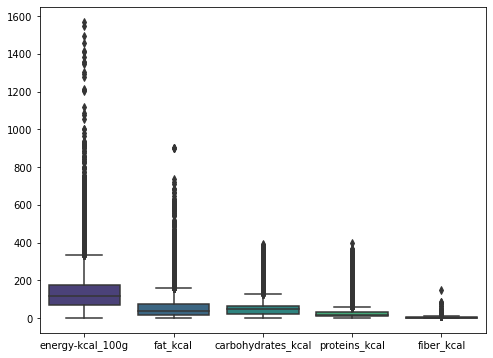

In [648]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_app1[["energy-kcal_100g", "fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]],
           palette="viridis")
plt.show()

**Retirons les outliers pour une meilleure visualisation**

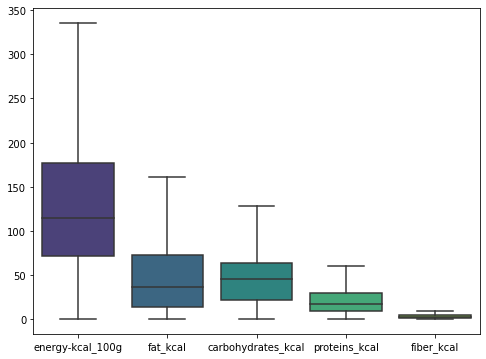

In [649]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_app1[["energy-kcal_100g", "fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]],
            showfliers=False,
            ax=ax,
           palette="viridis")
plt.show()

### II.2.2 Valeurs typiques et atypiques des compositions énergétiques totales par groupe d'aliments (pnns_groups)

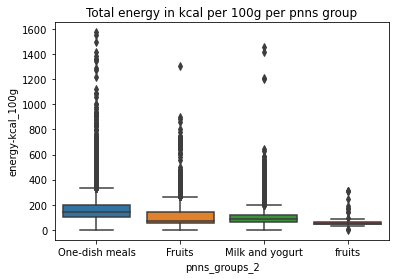

In [650]:
## graphe
sns.boxplot(x=df_app1["pnns_groups_2"],
            y=df_app1["energy-kcal_100g"],
           )
#plt.xlabel("energy-kcal_100g")
#plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy in kcal per 100g per pnns group")
plt.show()

**Sans les outliers**

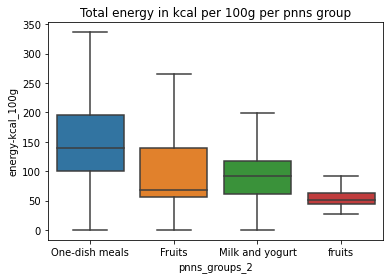

In [651]:
## graphe
sns.boxplot(x=df_app1["pnns_groups_2"],
            y=df_app1["energy-kcal_100g"],
           showfliers=False)
#plt.xlabel("energy-kcal_100g")
#plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy in kcal per 100g per pnns group")
plt.show()

Il va falloir traiter les outliers, et rassembler Fruits et fruits en une seule catégorie.

### II.2.3 Traitement des valeurs atypiques: cohérence des variables

Commençons par définir la catégorie "outliers" en référence à l'énergie pour 100g en kcal

In [116]:
outliers = df_app1.loc[df_app1["energy-kcal_100g"]>350]
outliers.sample(5)

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal
1454,Magret de canard cru,"en:meats,en:meals,en:meat-based-products,en:me...",d,One-dish meals,13.0,e,366.0,33.00,0.60,0.6,16.00,14.0,297.00,2.4,64.00
3522,Crème fraîche d'Isigny,"en:dairies,en:fermented-foods,en:creams,en:fer...",d,Milk and yogurt,55.0,c,381.0,40.00,2.90,2.9,2.40,14.0,360.00,11.6,9.60
6552,4 Vol au vent feuilletés à garnir,"en:meals,en:puff-pastry-meals,en:vol-au-vent",e,One-dish meals,NaN,NaN,508.0,33.40,42.00,0.8,7.30,21.0,300.60,168.0,29.20
1230,Carotte rapée,"en:meals,en:prepared-vegetables,en:grated-carr...",c,One-dish meals,83.0,b,364.0,0.26,6.45,0.0,0.77,8.0,2.34,25.8,3.08
18174,Cracky crêpes,"en:meals,en:crepes-and-galettes,en:crepes,fr:c...",e,One-dish meals,61.0,b,470.0,23.00,59.00,34.0,6.70,23.0,207.00,236.0,26.80


**Regardons de plus près l'élément 1230: il s'agit de carottes râpées. Comment ce plat peut-il avoir une valeur énergétique si élevée? Faute de frappe?**

<figure>
    <img src="./carotte_rapee.png"/>
    <figcaption>Item n°1230: Carotte rapée</figcaption>
</figure>

**Faute de frappe... On ne peut donc pas garder tous les outliers, il va falloir trier. On pourrait récupérer des produits semblables, regarder leur moyenne en energy-kcal_100g et comparer à notre "outlier". On pourrait ainsi déterminer si la valeur est aberrante ou non.**

#### II.2.3.i Traitement sur la sous-catégorie des carottes râpées

In [652]:
df_app1.iloc[1230]["categories_tags"]

'en:meals,en:prepared-vegetables,en:grated-carrots,en:seasoned-shredded-carrots'

Comme exemple de départ, on va regarder tous les "en:grated-carrots" et voir ce qu'on peut récupérer comme info. On élargira ensuite à d'autres catégories, et on essaiera de trouver une façon d'automatiser ce traitement pour les autres outliers.

In [653]:
# Commençons par créer une nouvelle colonne contenant True si la catégorie contient "en:grated-carrots",
# et False sinon.

df_app1["gr_carot"] = df_app1["categories_tags"].apply(lambda x: True if "en:grated-carrots" in x.split(",") else False)
df_app1.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,gr_carot
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,NaN,0.9,1.0,2.7,21.2,3.6,NaN,True
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,0.0,36.0,27.0,3.6,0.6,-2.0,0.0,144.0,2.4,6.84,False
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,12.7,3.9,1.0,NaN,1.9,1.0,114.3,15.6,7.6,NaN,False
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,15.0,1.0,1.0,NaN,24.0,17.0,135.0,4.0,96.0,NaN,False
4,Salade Grecque,"en:meals,en:salads,en:prepared-salads",b,One-dish meals,NaN,NaN,64.0,2.3,1.8,1.4,NaN,3.7,1.0,20.7,7.2,14.8,NaN,False


In [654]:
grated_carrots = df_app1.loc[df_app1["gr_carot"]]
grated_carrots.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,gr_carot
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,NaN,0.9,1.0,2.7,21.2,3.6,NaN,True
49,carottes rapées,"en:meals,en:prepared-vegetables,en:grated-carr...",c,One-dish meals,83.0,b,77.0,5.0,5.5,4.0,NaN,1.0,3.0,45.0,22.0,4.0,NaN,True
428,Carotte rapée,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,34.0,0.0,6.5,5.5,NaN,0.8,1.0,0.0,26.0,3.2,NaN,True
459,Carottes rapées,"en:meals,en:prepared-vegetables,en:grated-carr...",c,One-dish meals,83.0,b,207.0,20.0,4.9,4.0,NaN,0.7,7.0,180.0,19.6,2.8,NaN,True
468,Carottes rapees,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,110.0,8.9,5.6,4.7,NaN,0.7,2.0,80.1,22.4,2.8,NaN,True


In [655]:
grated_carrots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 35984
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             356 non-null    object 
 1   categories_tags          356 non-null    object 
 2   nutriscore_grade         308 non-null    object 
 3   pnns_groups_2            356 non-null    object 
 4   ecoscore_score_fr        356 non-null    float64
 5   ecoscore_grade_fr        356 non-null    object 
 6   energy-kcal_100g         293 non-null    float64
 7   fat_100g                 312 non-null    float64
 8   carbohydrates_100g       311 non-null    float64
 9   sugars_100g              315 non-null    float64
 10  fiber_100g               117 non-null    float64
 11  proteins_100g            314 non-null    float64
 12  nutrition-score-fr_100g  308 non-null    float64
 13  fat_kcal                 312 non-null    float64
 14  carbohydrates_kcal      

In [656]:
grated_carrots.describe()

,ecoscore_score_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal
count,356.000000,293.000000,312.000000,311.000000,315.000000,117.000000,314.000000,308.000000,312.000000,311.000000,314.000000,117.000000
mean,85.140449,82.146758,5.160032,6.179196,4.867746,2.591453,0.914809,0.863636,46.440288,24.716785,3.659236,4.923761
std,5.971995,44.413942,3.788127,2.143182,1.613243,0.855366,0.400019,3.554266,34.093144,8.572729,1.600074,1.625195
min,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,61.000000,3.200000,5.500000,4.050000,2.500000,0.800000,-2.000000,28.800000,22.000000,3.200000,4.750000
50%,83.000000,78.000000,5.000000,6.000000,5.000000,2.700000,0.900000,1.000000,45.000000,24.000000,3.600000,5.130000
75%,83.000000,92.000000,6.900000,6.800000,5.600000,3.000000,1.000000,3.000000,62.100000,27.200000,4.000000,5.700000
max,107.000000,364.000000,40.000000,25.000000,11.000000,4.700000,4.300000,13.000000,360.000000,100.000000,17.200000,8.930000


On remarque que la valeur indiquée de 364 kcal est en effet largement en dehors des valeurs "standards" pour ce type de produit (en fait il s'agit même de la valeur maximale). On remarque de plus que la somme des equivalents énergie des glucides, lipides, protéines et fibres suivent de près la valeur de l'energie (energy-kcal_100g), dans la très grande majorité des cas. Dans l'exemple des carottes râpées ci-dessus, l'énergie calculée à partir des macro-nutriments s'élève à environ 31 kcal, proche de la valeur réelle (indiquée sur l'emballage) de 36.4 kcal. A quel point cette remarque est-elle valable?

**Traçons le graphe des valeurs obtenues par le calcul à partir des macro-nutriments en fonction des valeurs données directement sur l'emballage. Si notre observation se confirme, on s'attend à une relation affine entre ces deux variables**

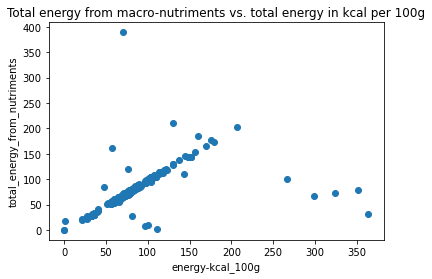

In [659]:
# Calcul de la somme dans une nouvelle colonne "total_energy_from_nutriments"
grated_carrots.loc[:, "total_energy_from_nutriments"] = grated_carrots[["fat_kcal","carbohydrates_kcal","proteins_kcal", "fiber_kcal"]].apply(lambda x: np.sum(x), axis=1)

# graphe
plt.scatter(x=grated_carrots["energy-kcal_100g"], y=grated_carrots["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

Il peut être intéressant, pour traiter les outliers, de repérer ceux dont les sommes glucides+lipides+protéines+fibres en kcal sont loin de correspondre à ce qu'on attendrait. On peut associer une deviation standard à ne pas dépasser. De plus, il faura vérifier si ce traitement peut marcher pour tous les produits.

Calcul de la valeur moyenne et de l'écart-type de la différence entre l'énergie calculée à partir des macro-nutriments et l'énergie tabulée (en kcal).

In [660]:
te_gr_c = grated_carrots["total_energy_from_nutriments"]
e_gr_c = grated_carrots["energy-kcal_100g"]

mean_gr_c = np.mean(te_gr_c-e_gr_c)
std_gr_c = np.std(te_gr_c-e_gr_c)
print(mean_gr_c, std_gr_c)

-6.606006832187911 40.3601873834916


In [661]:
# On retire tous les éléments situés à plus d'une std de la moyenne
grated_carrots.loc[:, "TE_E_difference"] = te_gr_c - e_gr_c

d = grated_carrots.loc[np.abs(grated_carrots["TE_E_difference"]-mean_gr_c) < std_gr_c]
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 35686
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product_name                  279 non-null    object 
 1   categories_tags               279 non-null    object 
 2   nutriscore_grade              276 non-null    object 
 3   pnns_groups_2                 279 non-null    object 
 4   ecoscore_score_fr             279 non-null    float64
 5   ecoscore_grade_fr             279 non-null    object 
 6   energy-kcal_100g              279 non-null    float64
 7   fat_100g                      279 non-null    float64
 8   carbohydrates_100g            279 non-null    float64
 9   sugars_100g                   279 non-null    float64
 10  fiber_100g                    96 non-null     float64
 11  proteins_100g                 279 non-null    float64
 12  nutrition-score-fr_100g       276 non-null    float64
 13  fat

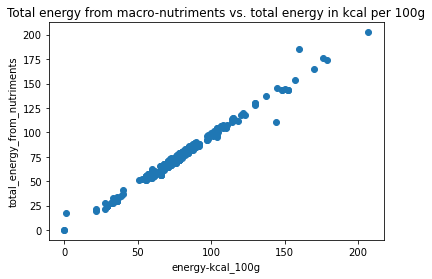

In [662]:
# graphe
plt.scatter(x=d["energy-kcal_100g"], y=d["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

**Le nettoyage semble être satisfaisant. Un avantage de cette méthode est qu'elle permet un nettoyage sans nécessiter le découpage en catégories. Répétons maintenant sur toutes les données.**

#### II.2.3.ii Traitement sur les données générales

In [663]:
df_app1.drop(columns="gr_carot", inplace=True)

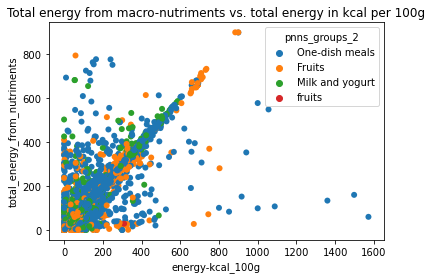

In [888]:
# Calcul de la somme dans une nouvelle colonne "total_energy_from_nutriments"
df_app1.loc[:, "total_energy_from_nutriments"] = df_app1[["fat_kcal","carbohydrates_kcal","proteins_kcal", "fiber_kcal"]].apply(lambda x: np.sum(x), axis=1)

## graphe
sns.scatterplot(x="energy-kcal_100g", 
                y="total_energy_from_nutriments",
                data=df_app1,
                linewidth=0,
                hue="pnns_groups_2"
               )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

**Surprise! Il semble qu'il existe plusieurs relations différentes. Selon les catégories?**

In [665]:
print("Categories: ", df_app1.pnns_groups_2.unique())

Categories:  ['One-dish meals' 'Fruits' 'Milk and yogurt' 'fruits']


1. **One-dish meals**

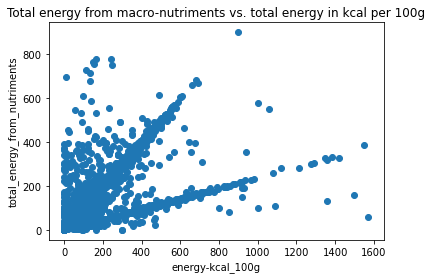

In [666]:
odm = df_app1.loc[df_app1.pnns_groups_2=="One-dish meals"]
## graphe
plt.scatter(x=odm["energy-kcal_100g"], y=odm["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

2. **Milk and yogurt**

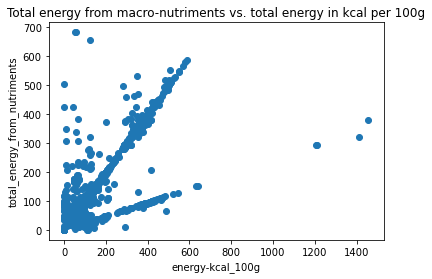

In [667]:
may = df_app1.loc[df_app1.pnns_groups_2=="Milk and yogurt"]
## graphe
plt.scatter(x=may["energy-kcal_100g"], y=may["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

3. **Fruits**

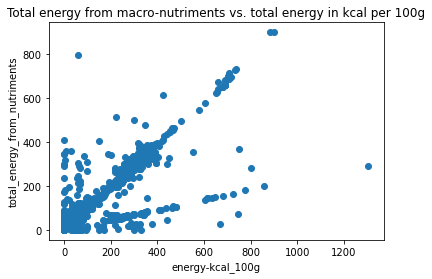

In [668]:
fru = df_app1.loc[df_app1.pnns_groups_2=="Fruits"] 
## graphe
plt.scatter(x=fru["energy-kcal_100g"], y=fru["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

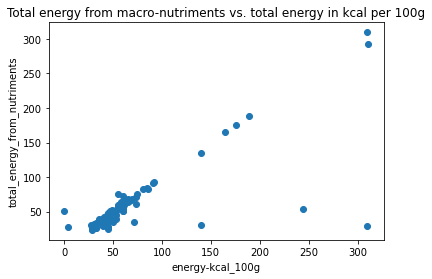

In [669]:
fru = df_app1.loc[df_app1.pnns_groups_2=="fruits"] 
## graphe
plt.scatter(x=fru["energy-kcal_100g"], y=fru["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

**Cette "double relation" semble être présente quelle que soit la catégorie envisagée (sauf pour "fruits" mais cela résulte sans doute du faible nombre d'éléments). Essayons de déterminer les différentes relations affines qui apparaissent sur ce graphe.**

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


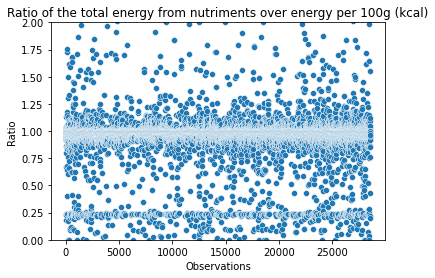

In [670]:
te = df_app1.loc[df_app1["energy-kcal_100g"].notna(), "total_energy_from_nutriments"]
e = df_app1.loc[df_app1["energy-kcal_100g"].notna(), "energy-kcal_100g"]

ratio  = te/e

x = range(len(ratio))

sns.scatterplot(x, ratio, markers=False)
plt.ylim([0, 2])
plt.ylabel("Ratio")
plt.title("Ratio of the total energy from nutriments over energy per 100g (kcal)")
plt.xlabel("Observations")
plt.show()

**Donc il semblerait que les deux relations soient associées aux coefficients ~1 et ~0.25. On s'attend à observer la même chose sur chaque pnns_group.**

**Sur les One-dish meals**

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


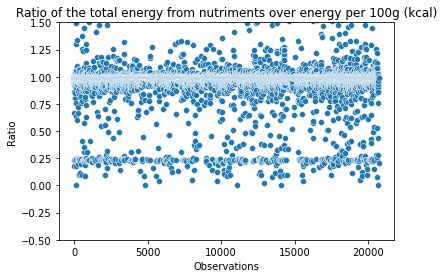

In [671]:
te_odm = odm["total_energy_from_nutriments"]
e_odm = odm["energy-kcal_100g"]

ratio_odm  = te_odm/e_odm
x = range(len(ratio_odm))

sns.scatterplot(x, ratio_odm, markers=False)
plt.ylim([-0.5, 1.5])
plt.ylabel("Ratio")
plt.title("Ratio of the total energy from nutriments over energy per 100g (kcal)")
plt.xlabel("Observations")
plt.show()

**Sur les Milk and yogurt**

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


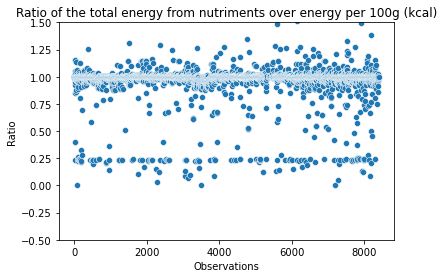

In [672]:
te_may = may["total_energy_from_nutriments"]
e_may = may["energy-kcal_100g"]

ratio_may  = te_may/e_may
x = range(len(ratio_may))

sns.scatterplot(x, ratio_may, markers=False)
plt.ylim([-0.5, 1.5])
plt.ylabel("Ratio")
plt.title("Ratio of the total energy from nutriments over energy per 100g (kcal)")
plt.xlabel("Observations")
plt.show()

**Sur les fruits**

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


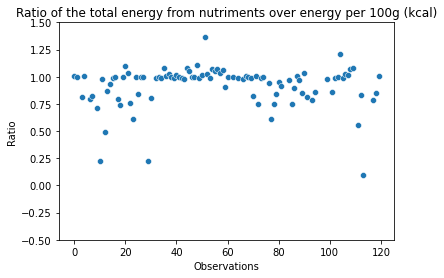

In [673]:
te_fru = fru["total_energy_from_nutriments"]
e_fru = fru["energy-kcal_100g"]

ratio_fru  = te_fru/e_fru
x = range(len(ratio_fru))

sns.scatterplot(x, ratio_fru, markers=False)
plt.ylim([-0.5, 1.5])
plt.ylabel("Ratio")
plt.title("Ratio of the total energy from nutriments over energy per 100g (kcal)")
plt.xlabel("Observations")
plt.show()

**On a donc deux relations qui se dégagent: une pour laquelle le rapport te/e vaut environ 1 (comme attendu), et l'autre pour laquelle ce rapport vaut 0.25. Explorons sur quelques produits.**

In [674]:
# Récupérons tous les produits dont la valeur "total_energy_from_nutriments" est comprise entre 0.2 et 0.3
# "energy-kcal_100g"

mask = df_app1[["total_energy_from_nutriments", "energy-kcal_100g"]].apply(lambda x: True if (x[0]<0.3*x[1] 
                                                                          and x[0]>0.2*x[1]) else False, axis=1)

df_app1.where(mask).dropna(subset=["total_energy_from_nutriments"])

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
15,Gratin Dauphinois,"en:meals,en:gratins,en:potato-gratin,en:dauphi...",d,One-dish meals,74.0,b,591.0,8.90,12.00,3.00,NaN,2.8,16.0,80.10,48.00,11.2,NaN,139.30
37,Chicken Arrabbiata Count on us,"en:meals,en:meat-based-products,en:pasta-dishe...",b,One-dish meals,29.0,d,442.0,1.90,13.50,1.00,NaN,7.7,2.0,17.10,54.00,30.8,NaN,101.90
134,Super fruity low fat live yogurt,"en:dairies,en:fermented-foods,en:fermented-mil...",c,Milk and yogurt,NaN,NaN,325.0,0.90,12.90,10.20,NaN,4.0,4.0,8.10,51.60,16.0,NaN,75.70
160,Beef cannelloni,"en:meats,en:meals,en:pasta-dishes,en:meat-prep...",d,One-dish meals,NaN,NaN,611.0,7.90,11.50,3.10,1.8,6.4,11.0,71.10,46.00,25.6,3.42,146.12
360,Compote Bio Pomme,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,240.0,0.10,12.50,11.60,NaN,0.3,-1.0,0.90,50.00,1.2,NaN,52.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36207,Ashoka Delhi Dal Makhani (vegan) (280G),en:meals,c,One-dish meals,NaN,NaN,480.0,6.70,9.80,0.50,4.0,4.1,3.0,60.30,39.20,16.4,7.60,123.50
36216,Soupe Vermicelle Poulet Phu Gia Vifon 50G Vietnam,"en:meals,en:soups",d,One-dish meals,NaN,NaN,362.0,3.40,15.00,5.20,NaN,2.6,15.0,30.60,60.00,10.4,NaN,101.00
36297,Kiwi Green Organic,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,88.0,b,344.0,0.70,14.70,8.80,NaN,1.2,-3.0,6.30,58.80,4.8,NaN,69.90
36325,Salade de fruits,"en:plant-based-foods-and-beverages,en:plant-ba...",b,Fruits,66.0,b,177.0,0.60,8.50,8.50,NaN,0.0,0.0,5.40,34.00,0.0,NaN,39.40


<table>
   <tr><figure>
       <td>
           <img src="./chicken.png", alt="Chicken Arrabbiata Count on us"/>
           <figcaption>Chicken Arrabbiata Count on us</figcaption>
           </td>
       <td>
           <img src="./beef_cannelloni.png", alt="Beef cannelloni"/>
           <figcaption>Beef cannelloni</figcaption>
           </td>
   </figure></tr>
   <tr><figure>
       <td>
           <img src="./compote_pomme.png", alt="Compote Bio Pomme"/>
           <figcaption>Compote Bio Pomme</figcaption>
           </td>
       <td>
           <img src="./yogurt.png", alt="Super fruity low fat live yogurt"/>
           <figcaption>Super fruity low fat live yogurt</figcaption>
           </td> 
   </figure></tr>
</table>


**Sur ces quatre produits, on peut voir qu'il s'agit d'une erreur lors du report des valeurs d'énergie: la valeur reportée est celle en kj, indiquée comme étant la valeur en kcal. Pour remédier à ce problème, il suffit donc de convertir les valeurs de kj à kcal en utilisant les conversions suivantes:**  
1 kcal = 4,1868 kJ  
1 kJ = 0,239 kcal

**Il nous faut maintenant récupérer les "bons" éléments, c'est-à-dire ceux dont la valeur "aberrante" ne résulte que d'un problème d'unité, et non ceux dont la valeur est déjà dans la bonne unité, ou bien ceux qui sont réellement aberrants. Commençons par afficher la distribution des valeurs sous forme d'un histogramme.**

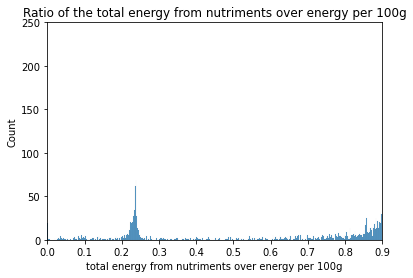

In [675]:
sns.histplot(ratio[ratio<2])
plt.xlim([0, 0.9])
plt.ylim([0, 250])
plt.title("Ratio of the total energy from nutriments over energy per 100g")
plt.xlabel("total energy from nutriments over energy per 100g")
plt.show()

**Pour récupérer les éléments auxquels on va appliquer la conversion, on ne va récupérer que les éléments compris entre 0.1 et 0.4, et regarder la moyenne et l'écart-type de cette distribution. D'après l'histogramme ci-dessus, on ne devrait pas faire trop d'erreur en procédant de cette manière**

In [676]:
sratio = ratio[ratio>0.1]
sratio = sratio[sratio<0.4]

mean = sratio.mean()
et = sratio.std()

print("Moyenne: {:.2f}\nMoyenne + ecart-type: {:.2f}\nMoyenne - ecart-type: {:.2f}".format(mean, mean+1*et, mean-1*et))

Moyenne: 0.24
Moyenne + ecart-type: 0.28
Moyenne - ecart-type: 0.19


**Donc on ne récupère que les éléments compris entre 0.19 et 0.28. Les autres seront considérés comme des valeurs aberrantes**

In [677]:
df_app1.loc[:, "ratio"] = df_app1[["total_energy_from_nutriments", "energy-kcal_100g"]].apply(lambda x: True if (x[0]<0.28*x[1] 
                                                                          and x[0]>0.19*x[1]) else False, axis=1)

In [678]:
df_app1.loc[df_app1.ratio]

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,ratio
15,Gratin Dauphinois,"en:meals,en:gratins,en:potato-gratin,en:dauphi...",d,One-dish meals,74.0,b,591.0,8.90,12.00,3.00,NaN,2.8,16.0,80.10,48.00,11.2,NaN,139.30,True
37,Chicken Arrabbiata Count on us,"en:meals,en:meat-based-products,en:pasta-dishe...",b,One-dish meals,29.0,d,442.0,1.90,13.50,1.00,NaN,7.7,2.0,17.10,54.00,30.8,NaN,101.90,True
134,Super fruity low fat live yogurt,"en:dairies,en:fermented-foods,en:fermented-mil...",c,Milk and yogurt,NaN,NaN,325.0,0.90,12.90,10.20,NaN,4.0,4.0,8.10,51.60,16.0,NaN,75.70,True
160,Beef cannelloni,"en:meats,en:meals,en:pasta-dishes,en:meat-prep...",d,One-dish meals,NaN,NaN,611.0,7.90,11.50,3.10,1.8,6.4,11.0,71.10,46.00,25.6,3.42,146.12,True
360,Compote Bio Pomme,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,240.0,0.10,12.50,11.60,NaN,0.3,-1.0,0.90,50.00,1.2,NaN,52.10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36207,Ashoka Delhi Dal Makhani (vegan) (280G),en:meals,c,One-dish meals,NaN,NaN,480.0,6.70,9.80,0.50,4.0,4.1,3.0,60.30,39.20,16.4,7.60,123.50,True
36216,Soupe Vermicelle Poulet Phu Gia Vifon 50G Vietnam,"en:meals,en:soups",d,One-dish meals,NaN,NaN,362.0,3.40,15.00,5.20,NaN,2.6,15.0,30.60,60.00,10.4,NaN,101.00,True
36297,Kiwi Green Organic,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,88.0,b,344.0,0.70,14.70,8.80,NaN,1.2,-3.0,6.30,58.80,4.8,NaN,69.90,True
36325,Salade de fruits,"en:plant-based-foods-and-beverages,en:plant-ba...",b,Fruits,66.0,b,177.0,0.60,8.50,8.50,NaN,0.0,0.0,5.40,34.00,0.0,NaN,39.40,True


**On convertit les valeurs (Kj) en (kcal).**

In [679]:
df_app1.loc[:, "energy-kcal_100g"] = df_app1[["energy-kcal_100g", "ratio"]].apply(lambda x: x[0]*0.239 if x[1] else x[0], axis=1)

Vérifions les résultats:

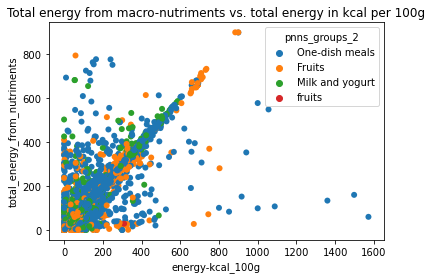

In [691]:
## graphe
sns.scatterplot(x=df_app1["energy-kcal_100g"],
                y=df_app1["total_energy_from_nutriments"],
                data=df_app1,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")


plt.show()

La transformation semble avoir fonctionné. Regardons de plus près comment se répartissent les différentes valeurs pour les variables nutritionnelles.

In [692]:
df_app1.drop(columns="ratio", inplace=True)
df_app1.describe()

,ecoscore_score_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
count,24727.000000,28543.000000,32286.000000,32287.000000,32271.000000,13916.000000,32406.000000,30768.000000,32286.000000,32287.000000,32406.000000,13916.000000,36373.000000
mean,57.178267,138.958333,6.230863,14.412681,6.942413,1.805734,5.687533,2.932332,56.077763,57.650723,22.750132,3.430894,122.532666
std,28.302880,97.020668,7.520649,14.936751,11.553750,2.193823,5.896560,5.631104,67.685845,59.747003,23.586240,4.168264,98.447855
min,-23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,70.000000,1.515775,5.300000,1.200000,0.600000,2.300000,-1.000000,13.641975,21.200000,9.200000,1.140000,57.800000
50%,57.000000,113.000000,4.000000,11.400000,3.000000,1.500000,4.300000,2.000000,36.000000,45.600000,17.200000,2.850000,101.340000
75%,80.000000,171.000000,8.100000,16.000000,9.700000,2.200000,7.400000,5.000000,72.900000,64.000000,29.600000,4.180000,160.780000
max,124.000000,1572.000000,100.000000,98.400000,85.200000,77.000000,100.000000,34.000000,900.000000,393.600000,400.000000,146.300000,900.000000


Comme observé plus haut, certaines valeurs aberrantes sont vraisemblablement des fautes de frappe. On peut contrôler ces outliers ainsi:
- récupérer les valeurs pour lesquelles "total_energy_from_nutriments"/"energy-kcal_100g" $\simeq$ 1
- pour les autres, regarder si val/10 ou val$\times$10 $\simeq$ "energy-kcal_100g
- si oui, corriger et garder
- si non, retirer du jeu de données

In [693]:
# Création d'une colonne outliers les cas où total_energy_from_nutriments/energy-kcal_100g
# est très différent de 1. D'abord, qu'est-ce que veut dire "très différent de 1"? Même méthode que ci-dessus.

# Distribution du ratio total_energy_from_nutriment/energy-kcal_100g
te_df = df_app1.loc[:, ["total_energy_from_nutriments", "energy-kcal_100g"]]
te_df.loc[:, "mask"] = te_df.apply(lambda x: False if x[0]==0 or x[1]==0 else True, axis=1)

te_fn = te_df.loc[te_df["mask"], "total_energy_from_nutriments"]
te = te_df.loc[te_df["mask"], "energy-kcal_100g"]
ratio = te/te_fn

ratio.describe()

count    28350.000000
mean         1.081337
std          2.393197
min          0.000800
25%          0.998635
50%          1.004632
75%          1.023496
max        318.269231
dtype: float64

In [694]:
data = ratio.sample(10000)

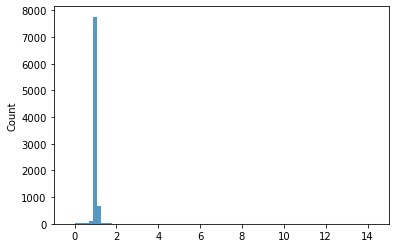

In [696]:
sns.histplot(data=data, bins=1800)
#plt.ylim([0, 5000])
plt.xlim([-1, 15])
plt.show()

Très peu de valeurs autour de 10, donc ce genre d'erreur est marginal. Regardons maintenant si beaucoup de valeurs sont telles que energy-kcal_100g est $\simeq$0.1$\times$ la vraie valeur.

In [697]:
# Création d'une colonne outliers les cas où total_energy_from_nutriments/energy-kcal_100g
# est très différent de 1. D'abord, qu'est-ce que veut dire "très différent de 1"? Même méthode que ci-dessus.

# Création de la variable total_energy_from_nutriment/energy-kcal_100g
te_df = df_app1.loc[:, ["total_energy_from_nutriments", "energy-kcal_100g"]]
te_df.loc[:, "mask"] = te_df.apply(lambda x: False if x[0]==0 or x[1]==0 else True, axis=1)

te_fn = te_df.loc[te_df["mask"], "total_energy_from_nutriments"]
te = te_df.loc[te_df["mask"], "energy-kcal_100g"]
ratio = te_fn/te

ratio.describe()

count    28350.000000
mean         1.224255
std         12.662393
min          0.003142
25%          0.977044
50%          0.995389
75%          1.001367
max       1249.999950
dtype: float64

In [698]:
data = ratio.sample(10000)

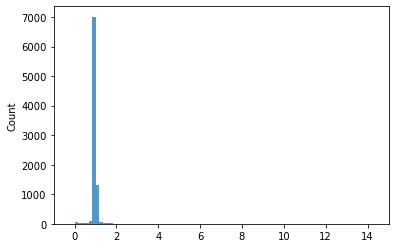

In [714]:
sns.histplot(data=data, bins=7500)
#plt.ylim([0, 5000])
plt.xlim([-1, 15])
plt.show()

Même conclusion. On va donc directement supprimer les valeurs incohérentes, c'est-à-dire celles pour lesquelles total_energy_from_nutriments est très différent de energy-kcal_100g. On commence par ne garder que les lignes pour lesquelles total_energy et energy sont différentes de 0 ou NaN, et pour lesquelles toutes les données liées aux macro-nutriments sont parfaitement renseignées. Ceci permet d'éviter d'éliminer des produit dont les valeurs energy-kcal_100g sont potentiellement correctes mais extrêmes (et qui pourraient être vues comme des valeurs aberrantes). En en gardant que les lignes où toutes les données liées aux macro-nutriments sont présentes, on réduit les risques de labeller incorrectement un produit "correct" en "aberrant" parce que sa valeur (calculée) total_energy_from_nutriments serait trop inférieure à sa valeur (donnée) energy-kcal_100g. Les lignes incomplètement renseignées seront traitées plus tard.

In [700]:
# Création d'une copie car on va modifier le dataframe
X = df_app1.copy()

# Remplacement des valeurs nulles par des NaN pour faciliter le traitement
X.loc[:, ["total_energy_from_nutriments"]] = \
X["total_energy_from_nutriments"].apply(lambda x: np.nan if x==0 else x)

X.loc[:, ["energy-kcal_100g"]] = \
X["energy-kcal_100g"].apply(lambda x: np.nan if x==0 else x)

# Création d'une nouvelle colonne qui contiendra l'information (True/False) permettant de traiter 
# ou non la ligne.
e_nn = X[["total_energy_from_nutriments",
          "energy-kcal_100g",
          "fat_kcal",
          "carbohydrates_kcal",
          "proteins_kcal",
          "fiber_kcal"]].apply(lambda x: True if x.isna().sum()==0 else False, axis=1)
df_app1.loc[:, "e_nn"] = e_nn

In [701]:
# On supprime les données pour lesquelles total_energy_... est supérieure à energy_kcal...
out_e = df_app1.loc[df_app1.e_nn==True, ["total_energy_from_nutriments", "energy-kcal_100g"]].apply(lambda x: True if x[0]>x[1] else False, axis=1)
df_app1.loc[:, "out_e"] = out_e

In [702]:
# visualisons le résultat de ces opérations
df_app1.loc[df_app1["out_e"]==True, ["energy-kcal_100g", "total_energy_from_nutriments", "e_nn", "out_e"]].sample(10)

,energy-kcal_100g,total_energy_from_nutriments,e_nn,out_e
26628,55.0,55.590000,True,True
35262,55.0,67.120000,True,True
26842,158.0,159.160001,True,True
14865,135.0,135.350000,True,True
12286,46.0,46.400000,True,True
32075,162.0,162.100000,True,True
11617,80.0,80.060000,True,True
34210,125.0,132.900000,True,True
18388,237.0,237.000000,True,True
25344,45.0,45.030000,True,True


In [703]:
# Combien de valeurs incohérentes?
df_app1[df_app1.out_e==True].shape

(4283, 20)

<table>
   <tr><figure>
       <td>
           <img src="./Bio_pomme.png", alt="Bio_pomme"/>
           <figcaption>Bio_pomme</figcaption>
           </td>
       <td>
           <img src="./quinoa-pois-chiches.png", alt="quinoa-pois-chiches"/>
           <figcaption>quinoa-pois-chiches</figcaption>
           </td>
   </figure></tr>
</table>
Erreurs d'arrondis?

<table>
    <tr><figure>
       <td>
           <img src="./pina-rodajas_1.png", alt="pina-rodajas_1"/>
           <figcaption>Piña Rodajas</figcaption>
           </td>
       <td>
           <img src="./pina-rodajas_2.png", alt="pina-rodajas_2"/>
           <figcaption>Piña Rodajas (2)</figcaption>
           </td> 
   </figure></tr>
</table>

Erreur lors du report des valeurs: présence de deux étiquettes pour ce produit qui proviennent vraisemblablement de deux produits différents!

<table>
    <tr><figure>
       <td>
           <img src="./makdous-eggplant.png", alt="makdous-eggplant"/>
           <figcaption>Makdous eggplant</figcaption>
       </td>
   </figure></tr>
</table>

Parfois la somme des valeurs des macro-nutriments ne correspond tout simplement pas à la valeur de l'énergie.

Il y a un nombre non-négligeable de valeurs incohérentes. On peut de plus voir qu'il y a deux "types" de valeurs aberrantes: celles probablement dues à des erreurs d'arrondis, d'autres plus franchement "aberrantes". On ne va donc pas retirer toutes les valeurs incohérentes comme définies ci-dessus, mais:
1. On va arrondir les valeurs calculées à l'entier inférieur
2. utiliser comme précédemment la méthode mean-std.

In [717]:
# On arrondit à l'entier inférieur
rounded_val = df_app1["total_energy_from_nutriments"].apply(lambda x: np.floor(x))
df_app1.loc[:, "total_energy_from_nutriments"] = rounded_val

In [718]:
# Nouveau bilan sur les valeurs incohérentes: on reprend la manipulation précédente 
# On supprime les données pour lesquelles total_energy_... est supérieure à energy_kcal...
out_e = df_app1.loc[df_app1.e_nn==True, ["total_energy_from_nutriments", "energy-kcal_100g"]].apply(lambda x: True if x[0]>x[1] else False, axis=1)
df_app1.loc[:, "out_e"] = out_e

In [719]:
# visualisons le résultat de ces opérations
df_app1.loc[df_app1["out_e"]==True, ["energy-kcal_100g", "total_energy_from_nutriments", "e_nn", "out_e"]].sample(10)

,energy-kcal_100g,total_energy_from_nutriments,e_nn,out_e
18028,85.0,86.0,True,True
18930,129.0,130.0,True,True
32243,145.0,162.0,True,True
33732,151.0,156.0,True,True
34924,33.0,39.0,True,True
16714,55.0,60.0,True,True
32136,31.0,35.0,True,True
28897,56.0,65.0,True,True
14736,223.0,225.0,True,True
14972,48.0,50.0,True,True


In [720]:
# Combien de valeurs incohérentes?
df_app1[df_app1.out_e==True].shape

(1965, 20)

Arrondir les valeurs total_energy_from_nutriments a permi de réduire le nombre de valeurs aberrantes d'un facteur 2!

On s'attaque au filtrage des "bonnes" et "mauvaises" valeurs en regardant la distribution de la différence entre total_energy... et energy-kcal_100g.

In [395]:
# On crée la distribution représentant la différence entre total_energy... et energy_...
tefn = df_app1.loc[df_app1.e_nn==True, "total_energy_from_nutriments"]
e = df_app1.loc[df_app1.e_nn==True, "energy-kcal_100g"]
diff = pd.Series(e-tefn, name="diff")

diff.describe()

count    10831.000000
mean         0.058665
std          3.198056
min        -25.800000
25%         -0.320000
50%          0.200000
75%          0.670000
max         24.600000
Name: diff, dtype: float64

In [782]:
diff.median()

1.0

**Affichons la distribution**

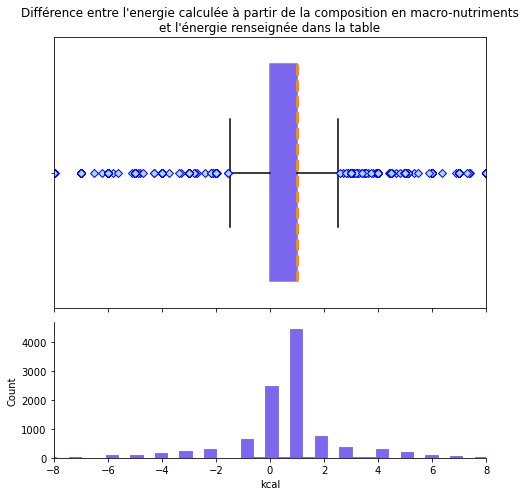

In [883]:
fig,(ax,ax2) = plt.subplots(nrows=2,sharex=True,figsize=(7,7),gridspec_kw={'height_ratios':[2,1]})
medianprops=dict(color="darkorange", linewidth=3, linestyle="--")
boxprops = dict(facecolor="mediumslateblue", edgecolor="mediumslateblue")
flierprops = dict(marker='D', markerfacecolor='lightblue', markersize=5,
                  linestyle='none', markeredgecolor='blue')  
whiskerprops = dict(color="black")
capprops = dict(color="black")
# Plot l'histogramme de la distribution
sns.boxplot(x=diff,
            orient="h",
            showfliers=True,
            color="blue",
            boxprops=boxprops,
            medianprops=medianprops,
            whiskerprops=whiskerprops,
            flierprops=flierprops,
            capprops=capprops,
            ax=ax
           )
ax.set_xlim([-10, 10])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title('''Différence entre l'energie calculée à partir de la composition en macro-nutriments
et l'énergie renseignée dans la table''');

# Trace un boxplot aligné
sns.histplot(data=diff,
             bins=3600,
             facecolor="mediumslateblue",
             edgecolor="mediumslateblue"
            )
ax2.set_xlim([-8, 8])
ax2.set_xlabel("kcal")
      
sns.despine(ax=ax2)
fig.tight_layout()    
plt.show()

In [788]:
print("mean + std = {:.2f}, mean-std = {:.2f}".format(diff.mean()+diff.std(), diff.mean()-diff.std()))

mean + std = 25.62, mean-std = -25.90


$\hookrightarrow$ on retire les outliers, c'est-à-dire les valeurs pour lesquelles diff $\geq$ 25.62 et diff $\leq$ -25.90

In [745]:
# Ajout d'une colonne contenant la valeur de la différence entre l'énergie calculée  et l'énergie renseignée.
df_app1.loc[:, "diff"] = diff
df_app1.sample(10)

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,...,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff
28946,Rondelles d'Orange,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,NaN,NaN,80.0,0.20,17.80,17.8,...,0.7,NaN,1.80,71.20,2.8,NaN,75.0,False,NaN,NaN
8049,Crème fouettée sous pression,"en:dairies,en:creams,en:whipped-creams",d,Milk and yogurt,55.0,c,303.0,28.00,12.00,12.0,...,2.2,15.0,252.00,48.00,8.8,NaN,308.0,False,NaN,NaN
26713,Pates & salade Jambon Emmental,"en:meals,en:salads,en:prepared-salads,en:refri...",b,One-dish meals,NaN,NaN,124.0,5.00,12.00,1.5,...,7.1,1.0,45.00,48.00,28.4,0.00,121.0,True,False,3.0
9722,Lait des éleveurs de la Bresse et du Val de Saône,"en:dairies,en:milks,en:homogenized-milks,en:se...",b,Milk and yogurt,63.0,b,46.0,1.55,4.80,4.8,...,3.2,0.0,13.95,19.20,12.8,NaN,45.0,False,NaN,NaN
6337,BLEDICHEF 250g Pâtes Etoiles à la Sauce Tomate...,"en:meals,en:baby-foods,en:pasta-dishes,en:from...",NaN,One-dish meals,NaN,NaN,73.0,2.10,9.80,1.3,...,3.3,NaN,18.90,39.20,13.2,2.28,73.0,True,False,0.0
17742,Escargots de Bourgogne en Crème d'Ail,"en:meals,en:fresh-foods,en:fresh-meals,en:refr...",c,One-dish meals,NaN,NaN,NaN,11.00,2.00,0.5,...,6.3,10.0,99.00,8.00,25.2,2.09,134.0,False,NaN,NaN
9747,Tajine de légumes aux abricots,"en:meals,en:prepared-vegetables,en:tajine",a,One-dish meals,NaN,NaN,80.0,4.00,8.30,5.5,...,1.3,-2.0,36.00,33.20,5.2,5.13,79.0,True,False,1.0
30336,Yaourt aromatisé fraise,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,Milk and yogurt,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN
4174,Boeuf bourguignon,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,-7.0,e,84.0,2.20,3.70,2.3,...,12.0,0.0,19.80,14.80,48.0,NaN,82.0,False,NaN,NaN
35098,Rayby,"en:dairies,en:fermented-foods,en:fermented-mil...",b,Milk and yogurt,76.0,b,87.0,2.90,12.14,3.0,...,2.7,2.0,26.10,48.56,10.8,NaN,85.0,False,NaN,NaN


In [751]:
# Vérification qu'il n'y a pas de valeur manquante pour diff 
df_app1.loc[df_app1["diff"].isna() & df_app1.e_nn==True]

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,...,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff


In [780]:
# Création d'une copie du dataframe
df_app1_no = df_app1.copy()

# Sélection des valeurs cohérentes grâce à la variable diff
df_app1_no = df_app1_no.loc[np.abs(df_app1_no["diff"]-diff.mean())<diff.std()]

df_app1_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10831 entries, 1 to 36368
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product_name                  10831 non-null  object 
 1   categories_tags               10831 non-null  object 
 2   nutriscore_grade              10321 non-null  object 
 3   pnns_groups_2                 10831 non-null  object 
 4   ecoscore_score_fr             6855 non-null   float64
 5   ecoscore_grade_fr             6855 non-null   object 
 6   energy-kcal_100g              10831 non-null  float64
 7   fat_100g                      10831 non-null  float64
 8   carbohydrates_100g            10831 non-null  float64
 9   sugars_100g                   10820 non-null  float64
 10  fiber_100g                    10831 non-null  float64
 11  proteins_100g                 10831 non-null  float64
 12  nutrition-score-fr_100g       10321 non-null  float64
 13  f

**Affichage du résultat du filtrage**

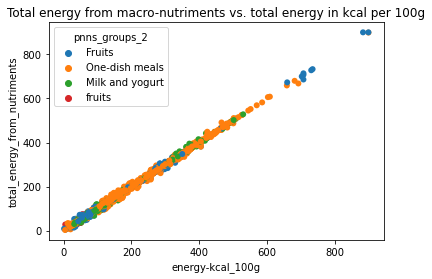

In [778]:
## graphe
sns.scatterplot(x=df_app1_no["energy-kcal_100g"],
                y=df_app1_no["total_energy_from_nutriments"],
                data=df_app1_no,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")


plt.show()

**Ainsi on n'a gardé que les valeurs cohérentes et dont les valeurs pour les macro-nutriments sont totalement renseignées:**

In [789]:
print(df_app1_no["e_nn"].unique())

[ True]


### II.2.4 Fusion des catégories Fruits et fruits

Sur le dataframe nettoyé:

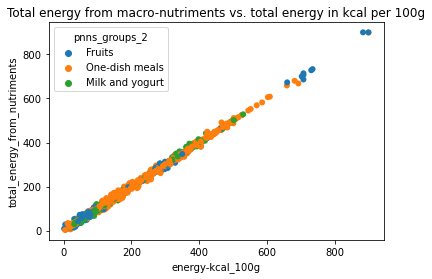

In [856]:
df_app1_no.loc[:, "pnns_groups_2"] = df_app1_no["pnns_groups_2"].apply(lambda x: "Fruits" if x=='fruits' else x)

## graphe
sns.scatterplot(x=df_app1_no["energy-kcal_100g"],
                y=df_app1_no["total_energy_from_nutriments"],
                data=df_app1_no,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")


plt.show()

Sur le dataframe original:

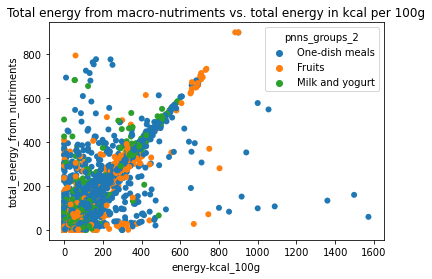

In [907]:
df_app1.loc[:, "pnns_groups_2"] = df_app1["pnns_groups_2"].apply(lambda x: "Fruits" if x=='fruits' else x)

## graphe
sns.scatterplot(x=df_app1["energy-kcal_100g"],
                y=df_app1["total_energy_from_nutriments"],
                data=df_app1,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")


plt.show()

**On nettoie le dataframe original**

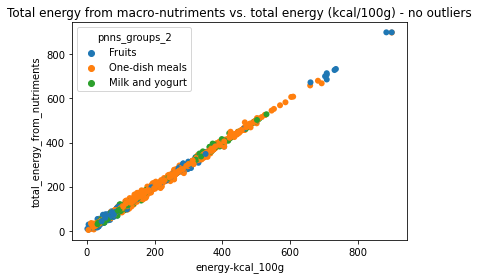

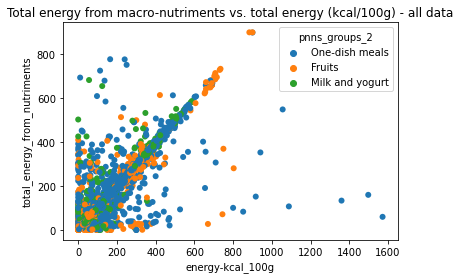

In [1103]:
Y = df_app1.loc[df_app1.e_nn==True]
drop_index = Y.loc[np.abs(Y["diff"]-diff.mean())>diff.std()].index
df_app1.drop(index=drop_index, inplace=True)

## graphe
sns.scatterplot(x=df_app1.loc[df_app1.e_nn==True, "energy-kcal_100g"],
                y=df_app1.loc[df_app1.e_nn==True, "total_energy_from_nutriments"],
                data=df_app1.loc[df_app1.e_nn==True],
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy (kcal/100g) - no outliers")


plt.show()

## graphe
sns.scatterplot(x=df_app1.loc[:, "energy-kcal_100g"],
                y=df_app1.loc[:, "total_energy_from_nutriments"],
                data=df_app1,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy (kcal/100g) - all data")

plt.show()

In [1135]:
df_app1_no.to_csv("./df_app1_no.csv", index_label=False)
df_app1.to_csv("./df_app1.csv", index_label=False)

## II.3 Traitement des valeurs manquantes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import missingno as msno

In [407]:
df_app1_no = pd.read_csv("df_app1_no.csv")
df_app1 = pd.read_csv("df_app1.csv")

In [358]:
df_app1.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,...,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff,f_na
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,...,1.0,2.7,21.2,3.6,NaN,27.50,False,NaN,NaN,3
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,0.0,36.0,27.0,...,-2.0,0.0,144.0,2.4,6.84,153.24,True,False,4.0,4
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,12.7,3.9,1.0,...,1.0,114.3,15.6,7.6,NaN,137.50,False,NaN,NaN,3
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,15.0,1.0,1.0,...,17.0,135.0,4.0,96.0,NaN,235.00,False,NaN,NaN,3
4,Salade Grecque,"en:meals,en:salads,en:prepared-salads",b,One-dish meals,NaN,NaN,64.0,2.3,1.8,1.4,...,1.0,20.7,7.2,14.8,NaN,42.70,False,NaN,NaN,3


**Matrice de remplissage du dataframe df_app1**

<AxesSubplot:>

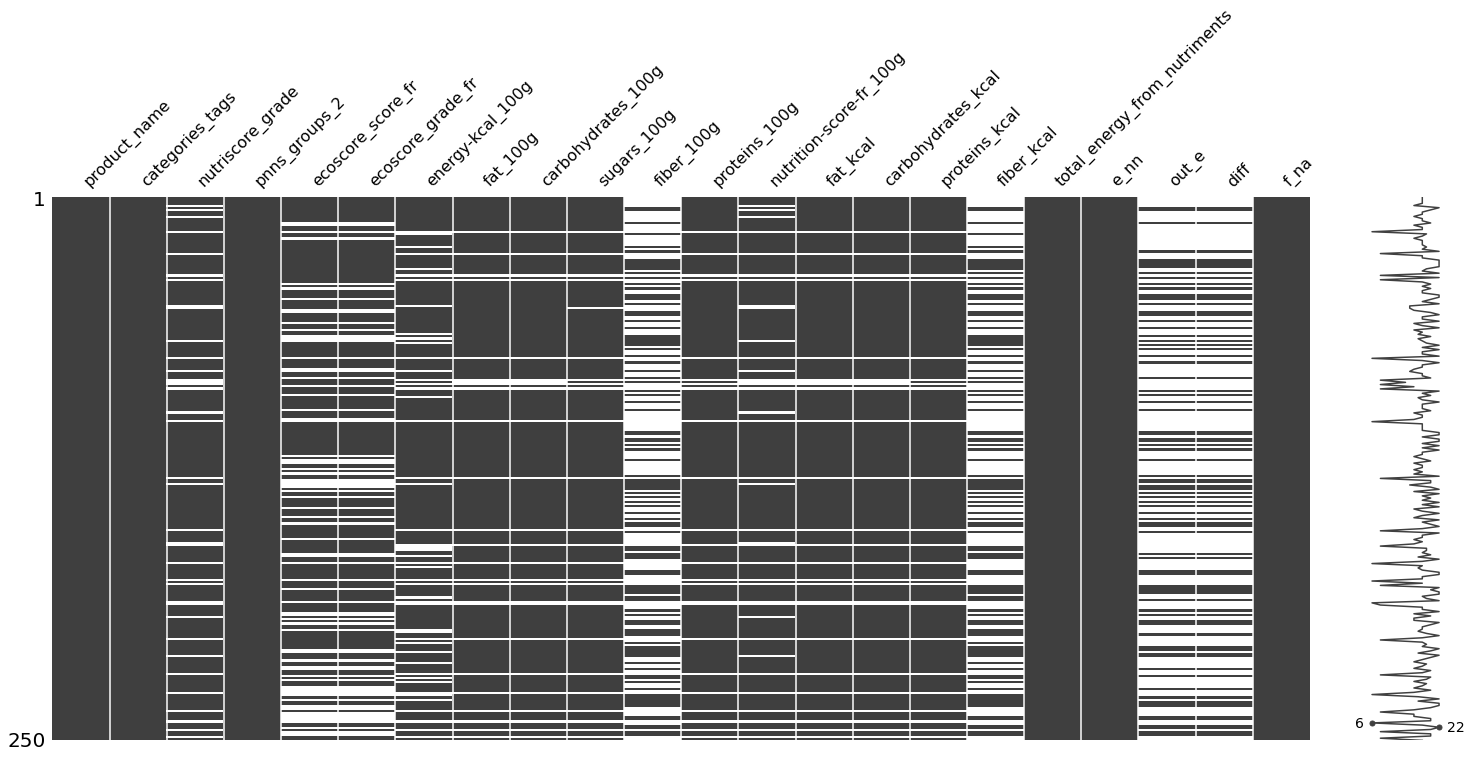

In [408]:
msno.matrix(df_app1.sample(250))

<AxesSubplot:>

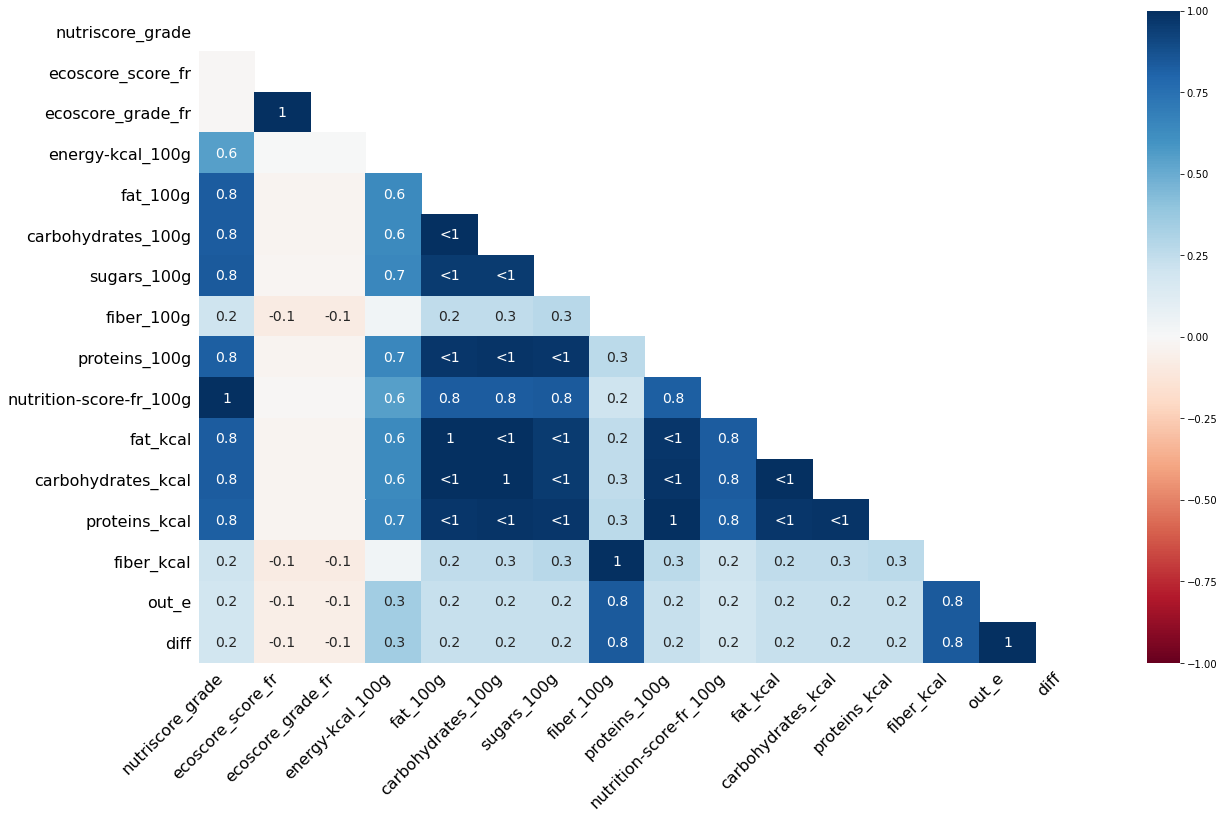

In [300]:
msno.heatmap(df_app1)

<AxesSubplot:>

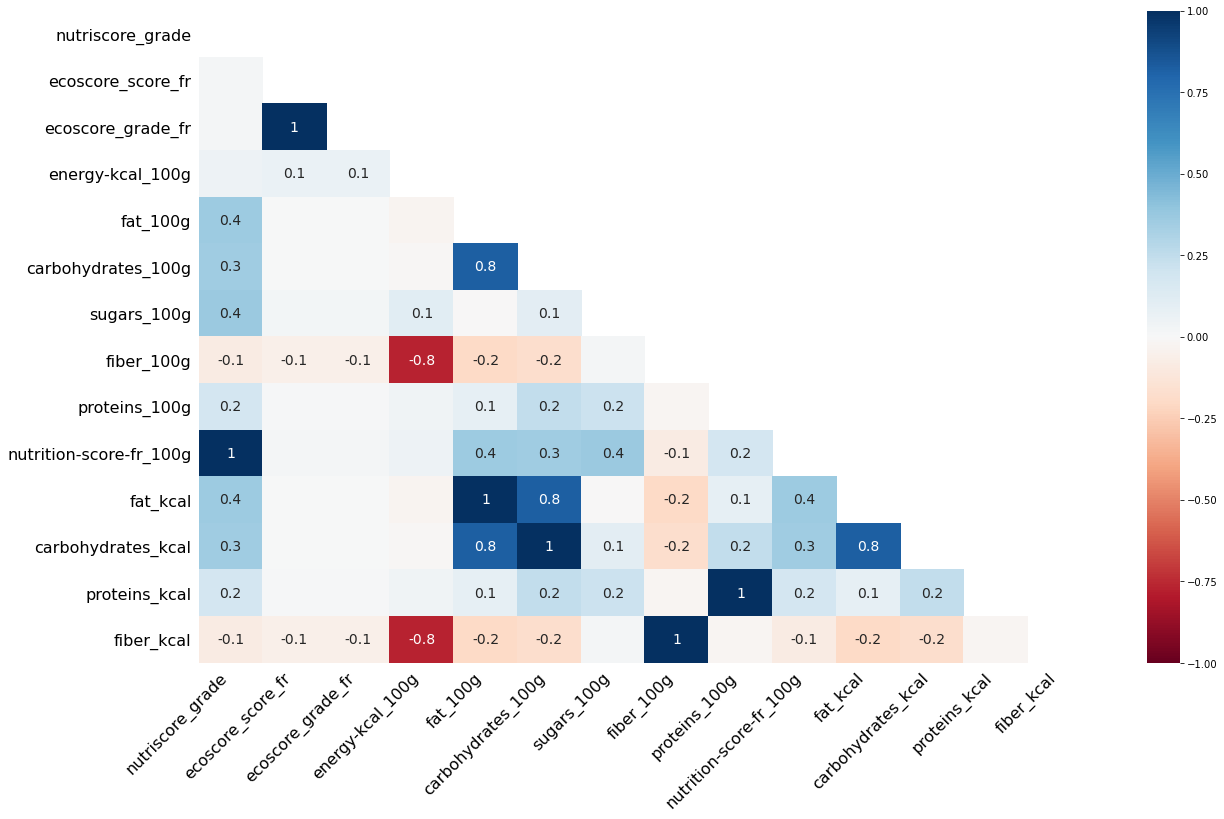

In [301]:
X = df_app1.loc[df_app1["total_energy_from_nutriments"]!=0]
msno.heatmap(X.loc[X.e_nn==False])

<AxesSubplot:>

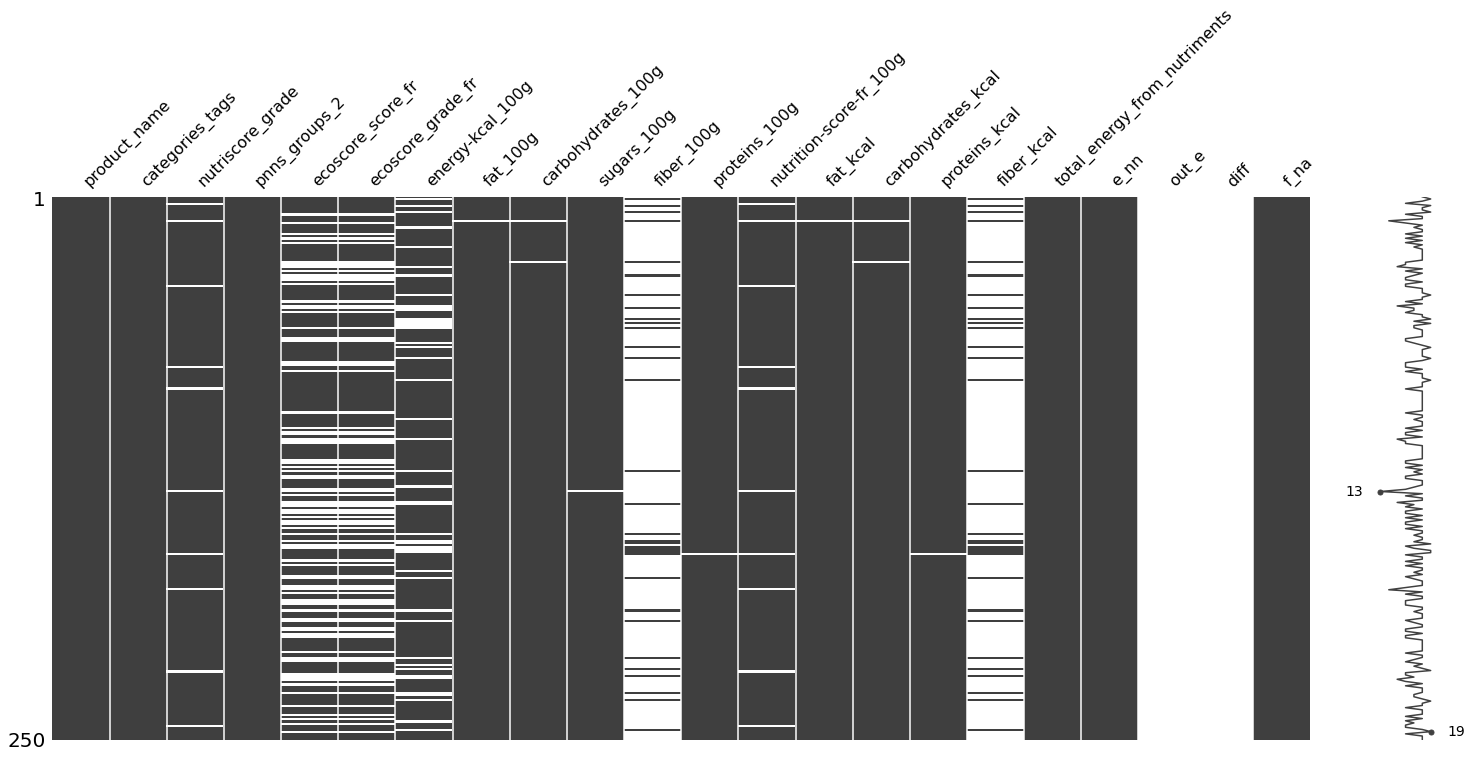

In [302]:
X = df_app1.loc[df_app1["total_energy_from_nutriments"]!=0]
msno.matrix(X.loc[X.e_nn==False].sample(250))

Si on se restreint aux données telles que la valeur total_energy_from_nutriments est non-nulle avec simultanément une des valeurs ["energy-kcal_100g", "fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"] non renseignée, alors c'est la valeur fiber_kcal qui ne sera pas renseignée avec une très haute probabilité. 

Vusalisation des points correspondants

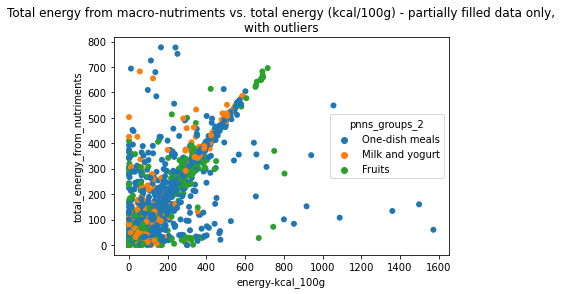

In [409]:
## graphe
sns.scatterplot(x=df_app1.loc[df_app1.e_nn==False, "energy-kcal_100g"],
                y=df_app1.loc[df_app1.e_nn==False, "total_energy_from_nutriments"],
                data=df_app1.loc[df_app1.e_nn==False],                
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy (kcal/100g) - partially filled data only,\nwith outliers")


plt.show()

On va donc commencer par remplir la colonne "fiber_kcal".

### II.3.1 Remplissage de fiber_kcal

On commence par sélectionner les lignes pour lesquelles seule la valeur de fiber_kcal est manquante.

In [410]:
X = df_app1.loc[df_app1[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].notna().sum(axis=1)==3]

In [371]:
X.sample(10)

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,...,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff,f_na
3870,Saucisses de Toulouse aux lentilles,"en:meals,en:meat-based-products,en:meals-with-...",c,One-dish meals,44.0,c,148.0,8.90,6.30,0.50,...,3.0,80.10,25.20,36.000000,0.00,141.30,True,False,7.0,4
21963,Yaourt Nature Maigre,"en:dairies,en:fermented-foods,en:fermented-mil...",a,Milk and yogurt,NaN,NaN,35.0,0.16,4.37,2.81,...,-2.0,1.44,17.48,16.440001,0.00,35.36,True,False,0.0,4
3641,Magret de canard sud ouest cru,"en:meats,en:meals,en:meat-based-products,en:me...",d,One-dish meals,13.0,e,343.0,30.00,1.20,0.50,...,13.0,270.00,4.80,64.000000,NaN,338.80,False,NaN,NaN,3
14945,"Tajine de poulet aux abricots, semoule aux épices","en:frozen-foods,en:meals,en:meat-based-product...",a,One-dish meals,36.0,d,137.0,3.20,19.00,3.30,...,-2.0,28.80,76.00,29.600000,2.47,136.87,True,False,1.0,4
281,Yaourt poire william & myrtilles,"en:dairies,en:fermented-foods,en:fermented-mil...",c,Milk and yogurt,54.0,c,183.0,9.40,19.40,12.40,...,8.0,84.60,77.60,16.800000,1.52,180.52,True,False,3.0,4
20733,Yaourt au lait miel confiture de lait,"en:dairies,en:fermented-foods,en:fermented-mil...",c,Milk and yogurt,NaN,NaN,118.0,3.00,18.00,18.00,...,3.0,27.00,72.00,19.200000,NaN,118.20,False,NaN,NaN,3
25420,Crêpes chocolat noisette,"en:meals,en:crepes-and-galettes,en:crepes,fr:c...",e,One-dish meals,38.0,d,469.0,25.00,53.00,37.00,...,19.0,225.00,212.00,27.600000,4.37,468.97,True,False,1.0,4
685,Salade piemontaise,"en:meals,en:salads,en:prepared-salads,en:potat...",b,One-dish meals,43.0,c,129.0,9.30,9.20,0.90,...,2.0,83.70,36.80,4.400000,NaN,124.90,False,NaN,NaN,3
21992,Cassoulet au confit de canard,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,57.0,c,144.0,7.10,8.90,0.70,...,2.0,63.90,35.60,39.200000,NaN,138.70,False,NaN,NaN,3
26070,Parmentier de poisson,"en:meals,en:fresh-foods,en:gratins,en:meals-wi...",c,One-dish meals,6.0,e,125.0,7.40,8.20,1.00,...,4.0,66.60,32.80,23.600000,1.52,124.52,True,False,1.0,4


On va commencer par compléter les valeurs de fiber_kcal sur ces lignes uniquement. Sur ces lignes, l'utilisation des autres valeurs (énergie, macro-nutriments) permet de calculer la valeur pour fiber_kcal par addition-soustraction

On complète les valeurs de fiber_kcal manquantes par la différence entre énergie-kcal_100g et energy_from_nutriments seulement si energie-kcal_100g > energy_from_nutriments; dans le cas contraire on remplace par 0.

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


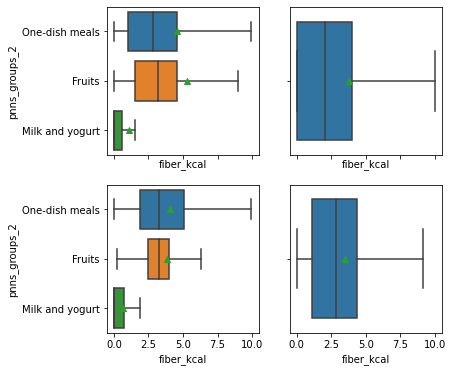

In [411]:
# 1. Complétion à l'aide des différences entre energie tabulée et énergie calculée
X["fiber_kcal"].fillna(round(X["energy-kcal_100g"]-X["total_energy_from_nutriments"], 1), inplace=True)

# 2. Nettoyage dans le cas où energy-kcal_100g < total_energy_from_nutrimens
X.loc[:, "fiber_kcal"] = X["fiber_kcal"].apply(lambda x: x if x>=0 else 0)

# 3. affichage de la distribution ainsi obtenue
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), sharex=True)
sns.boxplot(x="fiber_kcal",
            y="pnns_groups_2",
            data=X,
            showfliers=False,
            showmeans=True,
            ax=ax1)

sns.boxplot(x="fiber_kcal",
            data=X,
            showfliers=False,
            showmeans=True,
            ax=ax2)


sns.boxplot(x="fiber_kcal",
            y="pnns_groups_2",
            data=df_app1_no,
            showfliers=False,
            showmeans=True,
            order=["One-dish meals", "Fruits", "Milk and yogurt"],
            ax=ax3)

sns.boxplot(x="fiber_kcal",
            data=df_app1_no,
            showfliers=False,
            showmeans=True,
            ax=ax4)


plt.tight_layout
plt.show()

In [412]:
print(X.fiber_kcal.median(), "{:.2f}".format(X.fiber_kcal.mean()))
print(df_app1_no.fiber_kcal.median(), "{:.2f}".format(df_app1_no.fiber_kcal.mean()))

2.09 3.82
2.85 3.48


Mise à jour du dataframe df_app1

In [416]:
df_app1.loc[df_app1[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].notna().sum(axis=1)==3, "fiber_kcal"] = X
df_app1.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,...,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff,f_na
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,...,1.0,2.7,21.2,3.6,4.50,27.50,False,NaN,NaN,3
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,0.0,36.0,27.0,...,-2.0,0.0,144.0,2.4,6.84,153.24,True,False,4.0,4
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,12.7,3.9,1.0,...,1.0,114.3,15.6,7.6,5.50,137.50,False,NaN,NaN,3
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,15.0,1.0,1.0,...,17.0,135.0,4.0,96.0,0.00,235.00,False,NaN,NaN,3
4,Salade Grecque,"en:meals,en:salads,en:prepared-salads",b,One-dish meals,NaN,NaN,64.0,2.3,1.8,1.4,...,1.0,20.7,7.2,14.8,21.30,42.70,False,NaN,NaN,3


<AxesSubplot:>

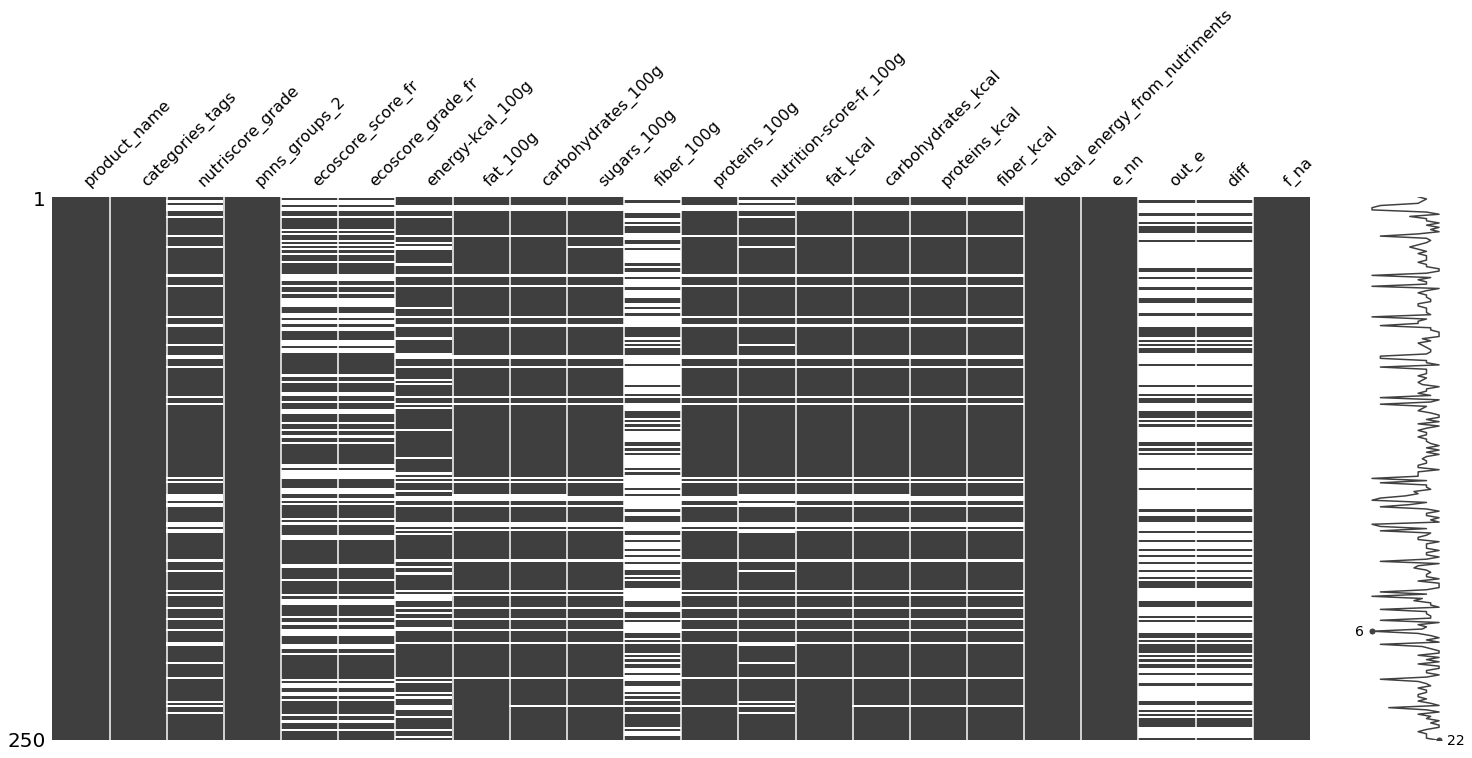

In [377]:
msno.matrix(df_app1.sample(250))

### II.3.2 Cas des autres macronutriments: fat, carbohydrates et proteins

Pour les valeurs manquantes restantes, on ne peut plus s'appuyer sur les autres macro-nutriments pour recréer la balance énergétique. On va donc utiliser les moyennes associées à chaque groupe "pnns_groups_2" ainsi que "first_tag"

In [417]:
X = df_app1.copy()
X.loc[:, "first_tag"] = X.apply(lambda x: x["categories_tags"].split(",")[0], axis=1)

for c in ["fat_kcal", "carbohydrates_kcal", 'proteins_kcal', 'fiber_kcal']:
    X.loc[X.e_nn==False, c] = X[c].fillna(round(X.groupby(["pnns_groups_2", "first_tag"], dropna=False)[c].transform("mean"), 1))

Visualisation des résultats

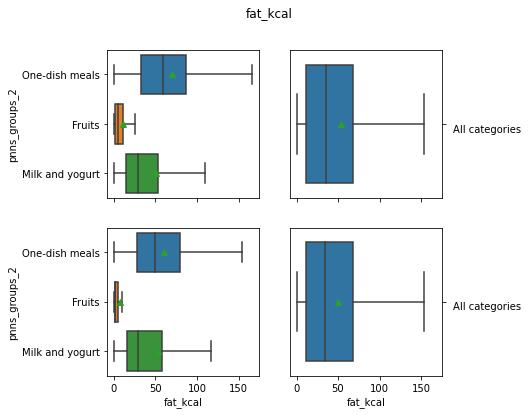

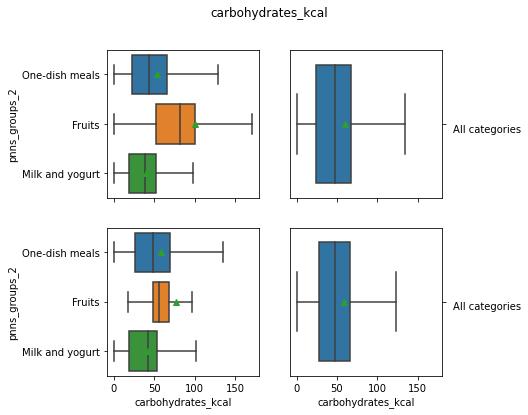

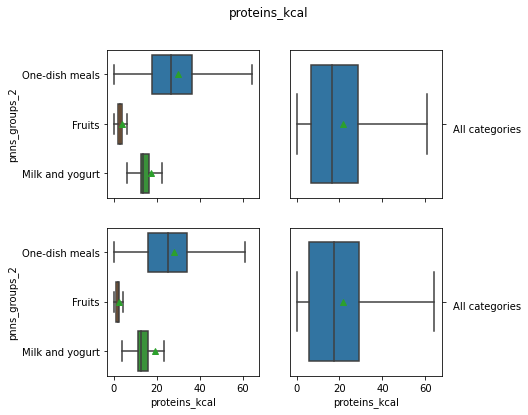

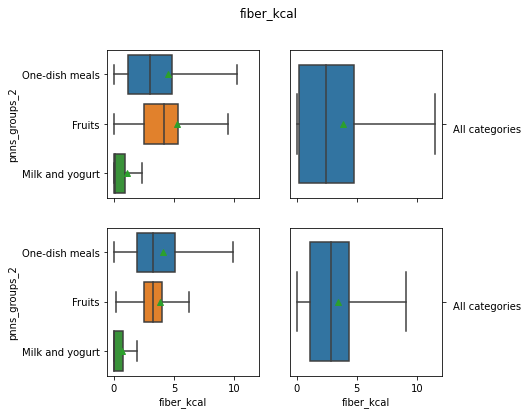

In [418]:
for c in ["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), sharex=True)
    sns.boxplot(x=c,
                y="pnns_groups_2",
                data=X,
                showfliers=False,
                showmeans=True,
                ax=ax1)
    ax1.set_xlabel("")
    
    sns.boxplot(x=c,
                data=X,
                showfliers=False,
                showmeans=True,
                ax=ax2)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()
    ax2.set_ylabel("All categories", rotation="horizontal", horizontalalignment="left")
    ax2.set_xlabel("")
    
    sns.boxplot(x=c,
                y="pnns_groups_2",
                data=NO,
                showfliers=False,
                showmeans=True,
                order=["One-dish meals", "Fruits", "Milk and yogurt"],
                ax=ax3)
    ax3.set_xlabel(c)
    
    sns.boxplot(x=c,
                data=NO,
                showfliers=False,
                showmeans=True,
                ax=ax4)
    ax4.yaxis.set_label_position("right")
    ax4.yaxis.tick_right()
    plt.ylabel("All categories", rotation="horizontal", horizontalalignment="left")
    plt.xlabel(c)
    plt.suptitle(c)
    plt.tight_layout
    plt.show()

mise à jour du dataframe

In [420]:
# 1. Mise à jour du dataframe df_app1 avec les valeurs renseignées.
df_app1.loc[df_app1.e_nn==False] = X

# 2. On remplace les valeurs nulles de la colonne total_energy_from_nutriments pour faciliter le traitement
df_app1.loc[:, "total_energy_from_nutriments"] = df_app1["total_energy_from_nutriments"].apply(lambda x: np.nan 
                                                                                               if x==0 else x)

# 3. Calcul des valeurs total_energy_from_nutriments à partir des valeurs des macronutriments 
# nouvellement renseignées.
Y = df_app1.copy()
Y["total_energy_from_nutriments"].fillna(Y["fat_kcal"]+Y["carbohydrates_kcal"]+Y["proteins_kcal"]+Y["fiber_kcal"], inplace=True)

Y.loc[:, "energy-kcal_100g"].fillna(round(Y.total_energy_from_nutriments, 1), inplace=True)

# 4. Mise à jour du dataframe
df_app1.loc[df_app1.e_nn==False] = Y

<AxesSubplot:>

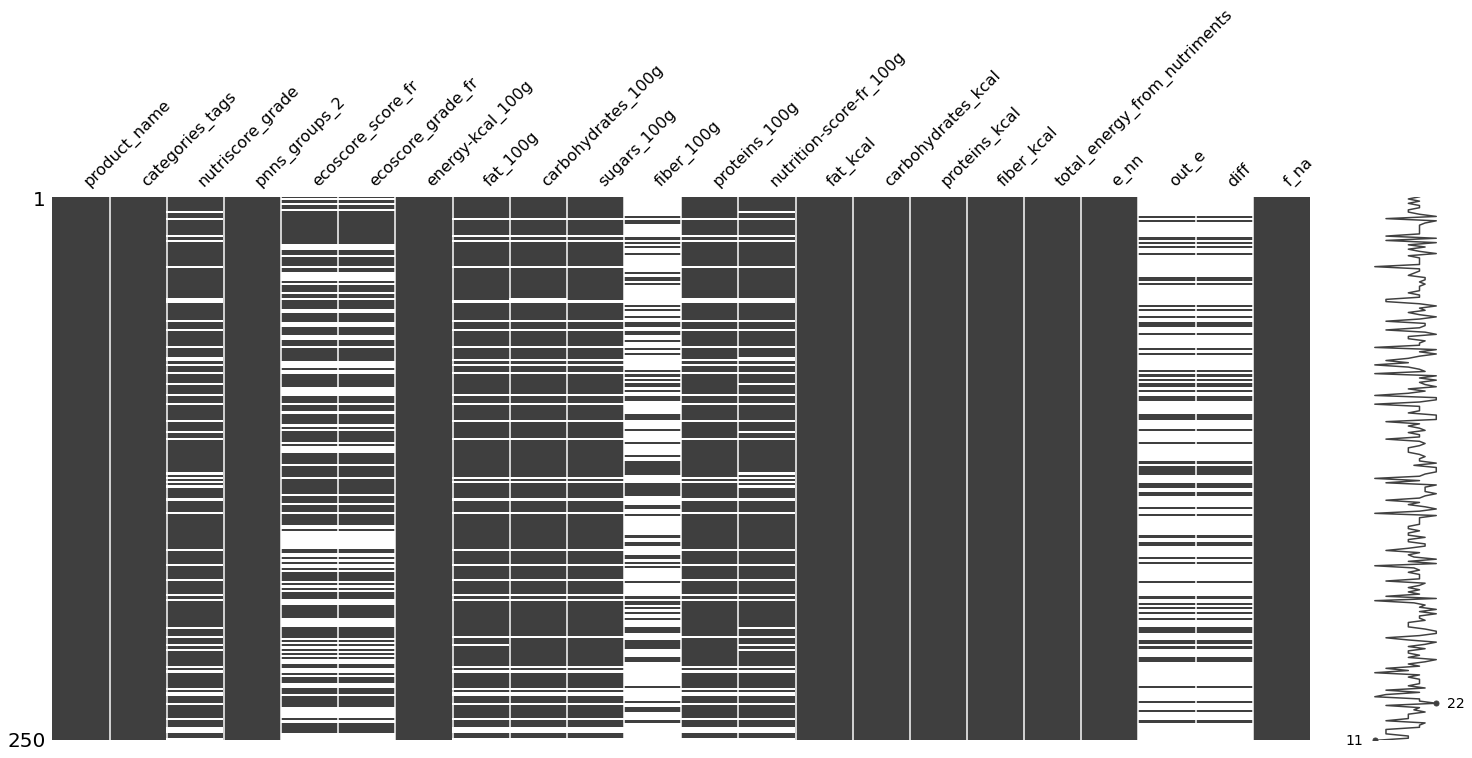

In [423]:
msno.matrix(df_app1.sample(250))

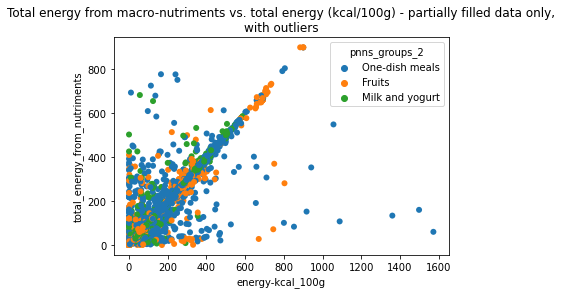

In [425]:
## graphe
sns.scatterplot(x=df_app1.loc[:, "energy-kcal_100g"],
                y=df_app1.loc[:, "total_energy_from_nutriments"],
                data=df_app1,                
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy (kcal/100g) - partially filled data only,\nwith outliers")


plt.show()

### II.3.3 Nettoyage des valeurs aberrantes (bis)

In [ ]:
# On crée la distribution représentant la différence entre total_energy... et energy_...
tefn = df_app1.loc[:, "total_energy_from_nutriments"]
e = df_app1.loc[:, "energy-kcal_100g"]
diff = pd.Series(e-tefn, name="diff")

In [430]:
# Mise à jour de la colonne diff
df_app1.loc[:, "diff"] = diff

Y = df_app1.copy()
drop_index = Y.loc[np.abs(Y["diff"]-diff.mean())>diff.quantile(0.95)].index # utilisation du 95ème percentile 
                                                                            # plutôt que l'écart-type, trop 
                                                                            # large à cause des outliers
Y.drop(index=drop_index, inplace=True)

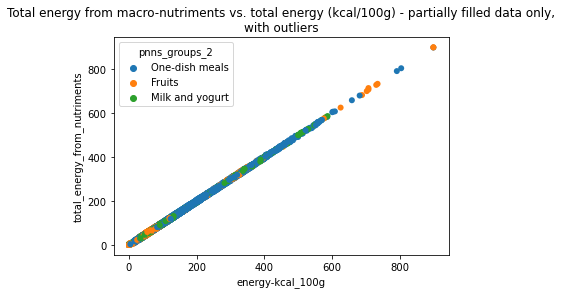

In [431]:
## graphe
sns.scatterplot(x=Y.loc[:, "energy-kcal_100g"],
                y=Y.loc[:, "total_energy_from_nutriments"],
                data=Y,                
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy (kcal/100g) - partially filled data only,\nwith outliers")


plt.show()

In [432]:
Y.index = pd.Index(range(0, len(Y)))
Y.iloc[Y.total_energy_from_nutriments.idxmax()]

product_name                                             Huile de pépin de raisin
categories_tags                 en:plant-based-foods-and-beverages,en:plant-ba...
nutriscore_grade                                                                c
pnns_groups_2                                                              Fruits
ecoscore_score_fr                                                              40
ecoscore_grade_fr                                                               c
energy-kcal_100g                                                              900
fat_100g                                                                      100
carbohydrates_100g                                                              0
sugars_100g                                                                     0
fiber_100g                                                                      0
proteins_100g                                                                   0
nutrition-score-

Mise à jour du dataframe

In [433]:
df_app1.drop(index=drop_index, inplace=True)

Export au format csv

In [434]:
df_app1.to_csv("./df_app1_clean.csv", index_label=False)

In [435]:
df_app1.shape

(33582, 22)

# III Automatisation des traitements

In [873]:
#automatisation
def select_clean(dataset="./en.openfoodfacts.org.products.csv"):
    
    # 1. Chargement du jeu de données
    df = pd.read_csv("./en.openfoodfacts.org.products.csv")
    
    # 2. Sélection des variables
    df1 = df.copy()
    df1.dropna(subset="product_name", inplace=True)
    selected_cols = ['product_name',
                     'categories_tags',
                     'countries_tags',
                     'pnns_groups_2',
                     'energy-kcal_100g',
                     'fat_100g',
                     'saturated-fat_100g',
                     'nutrition-score-fr_100g',
                     'nutriscore_grade',
                     'ecoscore_score_fr',
                     'ecoscore_grade_fr',
                     'fiber_100g',
                     'proteins_100g',
                     'carbohydrates_100g']
    df1 = df1[selected_cols]
    
    # Restriction aux produits français
    df_app1 = df1.loc[df1.countries_tags=="en:france"]
    
    # Restriction aux "One dish meal", "Fruits" et "Yoghourts"
    cat = ['One-dish meals','Fruits', 'Milk and yogurt', 'fruits']
    df_app1 = df_app1.loc[df_app1.pnns_groups_2.isin(cat)]
    
    # Restriction des indicateurs nutritionnels à "energy-kcal_100g", "fat_100g", "carbohydrates_100g", 
    # "sugars_100g", "proteins_100g", nutriscores et ecoscores
    
    #selected_var = ["product_name", "categories_tags", "nutriscore_grade", "pnns_groups_2",
    #      "ecoscore_score_fr", "ecoscore_grade_fr", "energy-kcal_100g", "fat_100g", "carbohydrates_100g",
    #      "sugars_100g", "fiber_100g", "proteins_100g", "nutrition-score-fr_100g"]
    
    # Sélection des produits "français" - en réalité, on filtre pour ne garder que des product_name français.
    df_app1.drop(columns="countries_tags", inplace=True)
    
    # Création des colonnes fat_kcal, carbohydrates_kcal, proteins_kcal, fiber_kcal et total_energy_from_nutriments
    df_app1.loc[:, "fat_kcal"] = df_app1["fat_100g"].apply(lambda x: x*9)
    df_app1.loc[:, "carbohydrates_kcal"] = df_app1["carbohydrates_100g"].apply(lambda x: x*4)
    df_app1.loc[:, "proteins_kcal"] = df_app1["proteins_100g"].apply(lambda x: x*4)
    df_app1.loc[:, "fiber_kcal"] = df_app1["fiber_100g"].apply(lambda x: x*1.9)
    
    # Calcul de la somme dans une nouvelle colonne "total_energy_from_nutriments"
    df_app1.loc[:, "total_energy_from_nutriments"] = df_app1[["fat_kcal","carbohydrates_kcal","proteins_kcal", "fiber_kcal"]].apply(lambda x: np.sum(x), axis=1)
    
    ########## Correction des valeurs données en kJ mais indiquées comme kcal. #########################
    # 1. Sélection des valeurs concernées
    df_app1.loc[:, "w_kcal"] = df_app1[["total_energy_from_nutriments", "energy-kcal_100g"]].apply(lambda x: True if (x[0]<0.28*x[1] 
                                                                         and x[0]>0.19*x[1]) else False, axis=1)
    # 2. Correction
    df_app1.loc[:, "energy-kcal_100g"] = df_app1[["energy-kcal_100g", "w_kcal"]].apply(lambda x: x[0]*0.239 if x[1] else x[0], axis=1)
    df_app1.drop(columns="w_kcal", inplace=True)
    
    ########## Sélection des valeurs cohérentes (énergie calculée ~ énergie tabulée), uniquement sur les lignes ########
    ########## pour lesquelles les données des macronutriments sont totalement renseignées ####################
    
    # 1. Création d'une copie car on va modifier le dataframe
    X = df_app1.copy()
    
    # 2. Remplacement des valeurs nulles par des NaN pour faciliter le traitement
    X.loc[:, ["total_energy_from_nutriments"]] = \
    X["total_energy_from_nutriments"].apply(lambda x: np.nan if x==0 else x)
    
    X.loc[:, ["energy-kcal_100g"]] = \
    X["energy-kcal_100g"].apply(lambda x: np.nan if x==0 else x)
    
    # 3. Création d'une nouvelle colonne qui contiendra l'information (True/False) permettant de traiter 
    # ou non la ligne.
    e_nn = X[["total_energy_from_nutriments",
              "energy-kcal_100g",
              "fat_kcal",
              "carbohydrates_kcal",
              "proteins_kcal",
              "fiber_kcal"]].apply(lambda x: True if x.isna().sum()==0 else False, axis=1)
    
    df_app1.loc[:, "e_nn"] = e_nn
    
    # 4. Lorsque les valeurs d'énergie calculée et d'énergie tabulée sont différentes à moins d'une 
    # voire deux unités près elles ne peuvent être considérés comme aberrants, mais résultent d'une erreur
    # d'arrondi. On commence donc par arrondir à l'entier inférieur les valeurs d'énergie calculées (il semble que ce soit la pratique retenue sur
    # les emballages)
    
    rounded_val = df_app1["total_energy_from_nutriments"].apply(lambda x: np.floor(x))
    df_app1.loc[:, "total_energy_from_nutriments"] = rounded_val
    
    # 5. On crée la distribution représentant la différence entre total_energy... et energy_...
    tefn = df_app1.loc[df_app1.e_nn==True, "total_energy_from_nutriments"]
    e = df_app1.loc[df_app1.e_nn==True, "energy-kcal_100g"]
    diff = pd.Series(e-tefn, name="diff")
    
    # 6. Ajout d'une colonne contenant la valeur de la différence entre l'énergie calculée  et l'énergie renseignée.
    df_app1.loc[:, "diff"] = diff
    
    # 7. Création d'une copie du dataframe
    df_app1_no = df_app1.copy()
    
    # 8. Sélection des valeurs cohérentes grâce à la variable diff
    df_app1_no = df_app1_no.loc[np.abs(df_app1_no["diff"]-diff.mean())<diff.std()]
    
    # 9. Reindexation du dataframe
    df_app1_no.index = pd.Index(range(0, df_app1_no.shape[0]))
    
    return df_app1_no